In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

In [ ]:
X = np.concatenate([np.random.rand(1,3,4,8), np.arange(96).reshape(1,3,4,8)], axis=0)
X = tf.constant(X)

# Attention Layer

**tf.matmul**
- The Inputs must be of rank >= 2
- The inner matrices of the inputs (last 2 dimensions) are the matrices to multiply. The other dimensions are batches (Is like to loop over the outer dimensions and only let the last 2 to make the matrix multiplication)

In [ ]:
Z = tf.matmul(X,X, transpose_b=(0,1,3,2))
min = tf.reduce_min(Z, axis=-1, keepdims=True)
max = tf.reduce_max(Z, axis=-1, keepdims=True)
Z_n = (Z - min)/(max - min + 1e-6)
out = tf.nn.softmax(Z_n)

In [ ]:
Z[1,0]

<tf.Tensor: shape=(4, 4), dtype=float64, numpy=
array([[  5.,  14.,  23.,  32.],
       [ 14.,  50.,  86., 122.],
       [ 23.,  86., 149., 212.],
       [ 32., 122., 212., 302.]])>

In [ ]:
Z_n[1,0] #Weak connectivities to strong connectivities

<tf.Tensor: shape=(4, 4), dtype=float64, numpy=
array([[0.        , 0.33333332, 0.66666664, 0.99999996],
       [0.        , 0.33333333, 0.66666666, 0.99999999],
       [0.        , 0.33333333, 0.66666666, 0.99999999],
       [0.        , 0.33333333, 0.66666666, 1.        ]])>

In [ ]:
out[1,0] #Strong to weak connectivities, not symmetric

<tf.Tensor: shape=(4, 4), dtype=float64, numpy=
array([[0.1416104 , 0.19763323, 0.27581939, 0.38493697],
       [0.1416104 , 0.19763323, 0.27581939, 0.38493697],
       [0.1416104 , 0.19763323, 0.27581939, 0.38493697],
       [0.1416104 , 0.19763323, 0.27581939, 0.38493697]])>

In [ ]:
out

<tf.Tensor: shape=(2, 3, 4, 4), dtype=float64, numpy=
array([[[[0.23818932, 0.392101  , 0.22546355, 0.14424612],
         [0.1919383 , 0.42784913, 0.22281554, 0.15739703],
         [0.2005806 , 0.4217495 , 0.2225167 , 0.15515319],
         [0.16617287, 0.45170355, 0.21397061, 0.16815297]],

        [[0.26008605, 0.12669241, 0.3443853 , 0.26883624],
         [0.21941555, 0.15089753, 0.41018096, 0.21950595],
         [0.22747242, 0.14182579, 0.38552221, 0.24517958],
         [0.25303027, 0.12904882, 0.35079072, 0.26713019]],

        [[0.28631468, 0.13272946, 0.22016053, 0.36079533],
         [0.16373396, 0.15088648, 0.41015048, 0.27522908],
         [0.16196571, 0.16275612, 0.44026809, 0.23501008],
         [0.21936638, 0.1270602 , 0.30818852, 0.3453849 ]]],


       [[[0.1416104 , 0.19763323, 0.27581939, 0.38493697],
         [0.1416104 , 0.19763323, 0.27581939, 0.38493697],
         [0.1416104 , 0.19763323, 0.27581939, 0.38493697],
         [0.1416104 , 0.19763323, 0.27581939, 0.38493

# Pearson Correlation Coefficient

In [ ]:
# (batch_norm, F, ch, T')
_, _, _, N = X.shape
X_mean, X_var = tf.nn.moments(X, axes=-1, keepdims=True)
X_std = tf.sqrt(X_var) + 1e-6
X_norm = (X - X_mean)/X_std
C = (1/N)*tf.matmul(X_norm, X_norm, transpose_b = (0,1,3,2))

In [ ]:
C

<tf.Tensor: shape=(2, 3, 4, 4), dtype=float64, numpy=
array([[[[ 0.9999935 ,  0.45851549,  0.45282518,  0.90609216],
         [ 0.45851549,  0.99999153,  0.99997075,  0.03949208],
         [ 0.45282518,  0.99997075,  0.99999083,  0.03310391],
         [ 0.90609216,  0.03949208,  0.03310391,  0.99999057]],

        [[ 0.99993995, -0.17657321, -0.99482265,  0.10760744],
         [-0.17657321,  0.99998988,  0.07598884, -0.99755622],
         [-0.99482265,  0.07598884,  0.99998769, -0.00637339],
         [ 0.10760744, -0.99755622, -0.00637339,  0.99997714]],

        [[ 0.99999438, -0.96885581, -0.69041528,  0.35803179],
         [-0.96885581,  0.99998652,  0.84802326, -0.115709  ],
         [-0.69041528,  0.84802326,  0.99999347,  0.42825738],
         [ 0.35803179, -0.115709  ,  0.42825738,  0.99999447]]],


       [[[ 0.99999755,  0.99999755,  0.99999755,  0.99999755],
         [ 0.99999755,  0.99999755,  0.99999755,  0.99999755],
         [ 0.99999755,  0.99999755,  0.99999755,  0.9999

In [ ]:
C_ = tfp.stats.correlation(X, sample_axis=-1, event_axis=-2)

In [ ]:
C_

<tf.Tensor: shape=(2, 3, 4, 4), dtype=float64, numpy=
array([[[[ 1.        ,  0.45851893,  0.45282873,  0.90609938],
         [ 0.45851893,  1.        ,  0.99997957,  0.03949243],
         [ 0.45282873,  0.99997957,  1.        ,  0.03310421],
         [ 0.90609938,  0.03949243,  0.03310421,  1.        ]],

        [[ 1.        , -0.17657941, -0.99485865,  0.1076119 ],
         [-0.17657941,  1.        ,  0.07598969, -0.99757267],
         [-0.99485865,  0.07598969,  1.        , -0.0063735 ],
         [ 0.1076119 , -0.99757267, -0.0063735 ,  1.        ]],

        [[ 1.        , -0.96886506, -0.69041948,  0.35803379],
         [-0.96886506,  1.        ,  0.84803175, -0.1157101 ],
         [-0.69041948,  0.84803175,  1.        ,  0.42825996],
         [ 0.35803379, -0.1157101 ,  0.42825996,  1.        ]]],


       [[[ 1.        ,  1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ,  1.    

# Proposed Model

In [ ]:
def pearson_by_channels(X):
  """
  Calculate the pearson correlation matrix of every channel in an image.
  INPUT:
  X: (batch_size, channels, rows, columns)
  OUTPUT:
  C: (batch_size, channels, rows, rows)
  """
  _, _, _, N = X.shape
  X_mean, X_var = tf.nn.moments(X, axes=-1, keepdims=True)
  X_std = tf.sqrt(X_var) + 1e-6
  X_norm = (X - X_mean)/X_std
  C = (1/N)*tf.matmul(X_norm, X_norm, transpose_b = (0,1,3,2))
  return C

def ReshapeGroupConv(F, D, Chans):
  """
  Reshape the Input to get an output shape that let to make the linear combination (weighted sum) 
  of the embedding channels by the convolution filters.
  """
  model = tf.keras.models.Sequential([tf.keras.layers.Reshape((F, D, Chans, 1)),
  tf.keras.layers.Permute((1,3,2,4)),
  tf.keras.layers.Reshape((F*Chans, D, 1))])
  return model

In [ ]:
#_, Chans, Samples = X.shape
tf.keras.backend.clear_session()
Chans, Samples = 22, 1500
fs = 250
F = 8
kernLength = int(fs/4)
D = 2
output_units = 2


input_  = tf.keras.layers.Input(shape = (1, Chans, Samples))
temporal_conv = tf.keras.layers.Conv2D(F, (1,kernLength), padding='same', data_format='channels_first', use_bias=False)(input_)
connectivity = tf.keras.layers.Lambda(pearson_by_channels)(temporal_conv)
channel_embedding = tf.keras.layers.DepthwiseConv2D(kernel_size=(1, Chans), data_format='channels_first', use_bias=False, depth_multiplier=D)(connectivity)
channel_embedding_reshape = ReshapeGroupConv(F, D, Chans)(channel_embedding)
graph_embedding = tf.keras.layers.Conv2D(filters=F, kernel_size=(1,1), data_format='channels_first', groups=F, use_bias=False)(channel_embedding_reshape)
graph_embedding_avg = tf.keras.layers.GlobalAveragePooling2D(data_format='channels_first')(graph_embedding)
class_layer = tf.keras.layers.Dense(output_units, activation='softmax')(graph_embedding_avg)
model = tf.keras.models.Model(inputs=[input_], outputs=[class_layer])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 22, 1500)]     0         
                                                                 
 conv2d (Conv2D)             (None, 8, 22, 1500)       1000      
                                                                 
 lambda (Lambda)             (None, 8, 22, 22)         0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 16, 22, 1)        352       
 Conv2D)                                                         
                                                                 
 sequential (Sequential)     (None, 176, 2, 1)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 2, 1)           176       
                                                             

#Experiment

In [2]:
!pip install mne==0.23 >/dev/null
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.EEG_Tensorflow_models.git >/dev/null

  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.EEG_Tensorflow_models.git /tmp/pip-req-build-e180zutc
  Running command git clone -q https://github.com/braindecode/braindecode /tmp/pip-install-7zghv6s2/braindecode_c0c0577098824800bca6b158d525bec2
  Running command git clone -q https://github.com/UN-GCPDS/moabb.git /tmp/pip-install-7zghv6s2/moabb_b7666f9b27de435090f908621c81b940


In [ ]:
from braindecode.datasets.moabb import MOABBDataset
from braindecode.preprocessing.preprocess import scale, exponential_moving_standardize, Preprocessor, preprocess
from braindecode.preprocessing.windowers import create_windows_from_events
import numpy as np
from scipy.signal import resample
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from mne.viz import plot_topomap

seed=2022
tf.keras.utils.set_random_seed(seed) #Sets all random seeds for the program (Python, NumPy, and TensorFlow)
################################################################################
#Read Databases

def load_dataset(dataset_name='BNCI2014001', subject_id=1, channels=None,
                 low_cut_freq_hz=4., high_cut_freq_hz=40.,
                 trial_start_offset_seconds=0.5, trial_stop_offset_seconds=0):
  
    """
    Load the data of a subject belonging to one of the available datasets in moabb package
    in a BaseConcatenate object of the braincode package.
    The default parameters load the data of the subject 1 of BCI Competition IV 2a database with the
    preprocessing applied in [Lawhern, V. J., Solon, A. J., Waytowich, N. R., Gordon, S. M., Hung, C. P., & Lance, B. J. (2018).
    EEGNet: a compact convolutional neural network for EEG-based brain–computer interfaces. Journal of neural engineering, 15(5), 056013.]

    INPUT
    -----
    1. dataset_name (str): Name of the dataset in the moabb package. Default='BNCI2014001'
    2. subject_id (int+): subject to load. Default=1
    3. channels (list of str | None): name of channels to select, if none select all channels. Default=None
    4. low_cut_freq_hz (float+): High pass frequency. Default=4.
    5. high_cut_freq_hz (float+): low pass frequency. Default=40.
    6. trial_start_offset_seconds (float): start offset relative to trial onset. Default=0.5
    7. trial_stop_offset_seconds (float): stop offset relative to the end of motor imagey taks. Default=-1.5

    OUTPUT
    ------
    1. windows_dataset (BaseConcatenate Object): BaseConcatenate object of WindowDataset objects of braincode package.
    """
  
    dataset = MOABBDataset(dataset_name=dataset_name, subject_ids=subject_id)

    # Parameters for exponential moving standardization
    factor_new = 1e-3
    init_block_size = 1000
    
    if channels == None:
        preprocessors = [
            Preprocessor('pick_types', eeg=True, meg=False, stim=False), # Keep EEG sensors
            Preprocessor(scale, factor=1e6, apply_on_array=True),  # Convert from V to uV
            Preprocessor('filter', l_freq=low_cut_freq_hz, h_freq=high_cut_freq_hz),  # Bandpass filter
            Preprocessor(exponential_moving_standardize,  # Exponential moving standardization
                        factor_new=factor_new, init_block_size=init_block_size)
        ]
    else:
        preprocessors = [
            Preprocessor('pick_types', eeg=True, meg=False, stim=False),  # Keep EEG sensors
            Preprocessor('pick_channels',ch_names=channels),
            Preprocessor(scale, factor=1e6, apply_on_array=True),  # Convert from V to uV
            Preprocessor('filter', l_freq=low_cut_freq_hz, h_freq=high_cut_freq_hz),  # Bandpass filter
            Preprocessor(exponential_moving_standardize,  # Exponential moving standardization
                        factor_new=factor_new, init_block_size=init_block_size)
        ]

    # Preprocess the data
    preprocess(dataset, preprocessors, n_jobs=-1)
    
    # Extract sampling frequency, check that they are same in all datasets
    sfreq = dataset.datasets[0].raw.info['sfreq']
    assert all([ds.raw.info['sfreq'] == sfreq for ds in dataset.datasets]), 'The sample frequency has to be the same for all BaseDatasets'

    # Create windows using braindecode function for this. It needs parameters to define how
    # trials should be used.
    windows_dataset = create_windows_from_events(
        dataset,
        trial_start_offset_samples=int(trial_start_offset_seconds*sfreq),
        trial_stop_offset_samples=int(trial_stop_offset_seconds*sfreq),
        preload=True,
        n_jobs=-1
    )

    return windows_dataset


def get_data_from_BaseConcatDataset(BCDataset):
    """
    Get data in numpy arrays objects from BaseConcatenate object.
    INPUT
    -----
    1. BCDataset (BaseConcatenate object)
    OUTPUT
    ------
    1. X (4D array): s<hape (trials, channels, time_samples, 1) 
    2. y (1D arrat): shape (trials)
    """
    n_trials = len(BCDataset)
    X = np.zeros((n_trials,) + BCDataset[0][0].shape + (1,))
    y = np.zeros(n_trials)
    for trial in range(n_trials):
        X[trial, :, : , 0], y[trial], _ = BCDataset[trial]
    
    return X,y

def get_classes(X, y, classes_id):
  """
  Select specific classes from the Database.
  INPUT
  -----
  1. X (4D array): shape (trials, 1, channels, time_samples) 
  2. y (1D arrat): shape (trials)
  3. classes_id (list of int): id of classes to select.
  OUTPUT
  ------
  1. X (4D array): shape (trials_classes, 1, channels, time_samples) 
  2. y (1D arrat): shape (trials_classes)
  """
  bool_idx = np.zeros(y.shape[0], dtype=np.bool8)
  for cls_id in classes_id:
    bool_idx += (y == cls_id)

  return X[bool_idx], y[bool_idx]

################################################################################
#EEGGC_Net

def pearson_by_channels(X):
  """
  Calculate the pearson correlation matrix of every channel in an image.
  INPUT:
  X: (batch_size, rows, columns, channels)
  OUTPUT:
  C: (batch_size, rows, rows, channels)
  """
  _, _, N, _ = X.shape
  X_mean, X_var = tf.nn.moments(X, axes=2, keepdims=True)
  X_std = tf.sqrt(X_var) + 1e-6
  X_norm = (X - X_mean)/X_std
  X_norm_NCHW = tf.transpose(X_norm, perm=(0,3,1,2))
  C_NCHW  = (1/N)*tf.matmul(X_norm_NCHW, X_norm_NCHW, transpose_b=True)
  C = tf.transpose(C_NCHW, perm=(0,2,3,1))
  return C

def ReshapeGroupConv(F, D, Chans):
  """
  Reshape the Input to get an output shape that let to make the linear combination (weighted sum) 
  of the embedding channels through the convolution filters.
  """
  model = tf.keras.models.Sequential([tf.keras.layers.Reshape((Chans, 1, F, D)),
  tf.keras.layers.Permute((4, 2, 3, 1)),
  tf.keras.layers.Reshape((D, 1, F*Chans))])
  return model

def EEGGC_Net_model(n_classes, Chans=22, Samples=875,
              F=4, kernLength=63, D=2):
  """
  Keras Implementation of EEGGC_Net
  INPUT
  -----
  n_classes (int+): Number of classes.
  Chans (int+): Number of channels.
  Samples (int+): Number of time Samples.
  F (int+): Number of Temporal Filters.
  KernLenght (int+): Size of temporal kernels.
  D (int+): Dimension of channels embedding.
  OUTPUT
  ------
  model (Keras model): EEGC_Net
  """

  input_  = tf.keras.layers.Input(shape=(Chans,Samples,1), name='input')
  temporal_conv = tf.keras.layers.Conv2D(F, (1,kernLength), padding='same',
                                         use_bias=False, name='temporal_Conv')(input_)
  connectivity = tf.keras.layers.Lambda(pearson_by_channels,
                                        name='pearson_Cxx')(temporal_conv)
  channel_embedding = tf.keras.layers.DepthwiseConv2D(kernel_size=(1, Chans), use_bias=False,
                                                      depth_multiplier=D,
                                                      name='channel_embedding')(connectivity)
  channel_embedding_reshape = ReshapeGroupConv(F, D, Chans)(channel_embedding)
  graph_embedding = tf.keras.layers.Conv2D(filters=F, kernel_size=(1,1), groups=F,
                                           use_bias=False,
                                           name='graph_embedding')(channel_embedding_reshape)
  graph_embedding_avg = tf.keras.layers.GlobalAveragePooling2D(name='avg_graph_embedding')(graph_embedding)
  dense = tf.keras.layers.Dense(n_classes, name='dense')(graph_embedding_avg)
  class_layer = tf.keras.layers.Activation('softmax', name='output')(dense)
  model = tf.keras.models.Model(inputs=[input_], outputs=[class_layer], name='EEGGC_Net')
  return model

In [3]:
#EEGGC_Net

def ReshapeGroupConv(F, D, Chans):
  """
  Reshape the Input to get an output shape that let to make the linear combination (weighted sum) 
  of the embedding channels through the convolution filters.
  """
  model = tf.keras.models.Sequential([tf.keras.layers.Reshape((Chans, 1, F, D)),
  tf.keras.layers.Permute((4, 2, 3, 1)),
  tf.keras.layers.Reshape((D, 1, F*Chans))])
  return model

def EEGGC_Net_model(n_classes, Chans=22,
                    F=4, D=2):
  """
  Keras Implementation of EEGGC_Net
  INPUT
  -----
  n_classes (int+): Number of classes.
  Chans (int+): Number of channels.
  Samples (int+): Number of time Samples.
  F (int+): Number of Temporal Filters.
  KernLenght (int+): Size of temporal kernels.
  D (int+): Dimension of channels embedding.
  OUTPUT
  ------
  model (Keras model): EEGC_Net
  """

  input_  = tf.keras.layers.Input(shape=(Chans,Chans,F), name='input')
  #temporal_conv = tf.keras.layers.Conv2D(F, (1,kernLength), padding='same',
  #                                       use_bias=False, name='temporal_Conv')(input_)
  #connectivity = tf.keras.layers.Lambda(pearson_by_channels,
  #                                      name='pearson_Cxx')(temporal_conv)
  channel_embedding = tf.keras.layers.DepthwiseConv2D(kernel_size=(1, Chans), use_bias=False,
                                                      depth_multiplier=D,
                                                      name='channel_embedding')(input_)
  channel_embedding_reshape = ReshapeGroupConv(F, D, Chans)(channel_embedding)
  graph_embedding = tf.keras.layers.Conv2D(filters=F, kernel_size=(1,1), groups=F,
                                           use_bias=False,
                                           name='graph_embedding')(channel_embedding_reshape)
  graph_embedding_avg = tf.keras.layers.GlobalAveragePooling2D(name='avg_graph_embedding')(graph_embedding)
  dense = tf.keras.layers.Dense(n_classes, name='dense')(graph_embedding_avg)
  class_layer = tf.keras.layers.Activation('softmax', name='output')(dense)
  model = tf.keras.models.Model(inputs=[input_], outputs=[class_layer], name='EEGGC_Net')
  return model

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# PLV
f_frec = np.arange(1., 44., 2.)
if fre == 0:
  f_frec[2:4]
elif fre == 1:
  f_frec[4:6]
elif fre == 2:
  f_frec[6:15]

# gauss
# [1,4],[4,8],[8,12],[12,16],[16,20],[20,30],[30,45]
if fre == 0:
  f_frec[1:2]
elif fre == 1:
  f_frec[2:3]
elif fre == 2:
  f_frec[3:6]

In [5]:
import matplotlib.pyplot as plt
from scipy.signal.waveforms import square
from sklearn.model_selection import train_test_split
from scipy.io import savemat
from scipy.io import loadmat
import tensorflow as tf
from sklearn.metrics import accuracy_score
import pickle
from scipy.spatial.distance import squareform
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'

fs = 1000
freq_plv = [[2,4],[4,6],[6,15]]
freq_gaus= [[1,2],[2,3],[3,6]]
freq = 0
#k = 48 # número de ventanas
k_ = [6,12,24,48]
for k in k_:
  if k == 1:
    tau = 12
    overlap = 1-1  
    ti = 3
    tf = 15

  elif k == 3:
    tau = 4
    overlap = 1-0.5  
    ti = 3
    tf = 15-tau

  elif k == 6:
    tau = 2.75
    overlap = 1-0.5  
    ti = 3
    tf = 15-tau

  elif k == 12:
    tau = 1.7
    overlap = 1-0.5  
    ti = 3
    tf = 15-tau

  elif k == 24:
    tau = 0.9
    overlap = 1-0.5  
    ti = 3
    tf = 15-tau

  elif k == 48:
    tau = 0.475
    overlap = 1-0.5  
    ti = 3
    tf = 15-tau

  # ventanas en el tiempo
  if k == 1:
    tti = np.arange(ti,tf,tau)
    ttf = np.arange(ti+tau,tf+tau,tau)
    vtw = np.array([tti,ttf]).T

    print(vtw.shape)
    windows = np.arange(int(ti*fs),int((tf)*fs),int(tau))
    print(windows.shape)
    
  else:
    tti = np.arange(ti,tf-tau+(tau*overlap),tau*overlap)
    ttf = np.arange(ti+tau,tf+tau*overlap,tau*overlap)
    vtw = np.array([tti,ttf]).T

    print(vtw.shape)
    windows = np.arange(int(ti*fs),int((tf-tau*overlap)*fs),int(tau*overlap*fs))
    print(windows.shape)

  Con_pearson = list() 
  for fr in range(7):# 4) 1. alpha, 2. beta low, 3. beta mid y 4. high beta.
    Con_ = list()
    for s in range(31):
      #name_ = 'phy'
      #tem = pickle.load(open(path+'pearson_physionet_resting'+str(np.int(SS[s]))+'.p', "rb" ))
      name_ = 'giga'
      tem = pickle.load(open(load_path+'kcon_'+str(k)+'_music'+str(s)+'.p', "rb" ))
      Con_.append([np.asarray([tem[:,:,:,fr]])])
    Con_pearson.append(np.squeeze(np.asarray(Con_)))

  Con_pearson1 = list() 
  # for fr in range(7):# 4) 1. alpha, 2. beta low, 3. beta mid y 4. high beta.
  # Con_ = list()
  for s in range(0,31):
    #name_ = 'phy'
    #tem = pickle.load(open(path+'pearson_physionet_resting'+str(np.int(SS[s]))+'.p', "rb" ))
    # name_ = 'giga'
    tem = loadmat(load_path+f'PLV_all_'+str(k)+'_subs'+str(s+1)+'_music2.mat')['PLV']
    tem = tem[-1,:,:,:,:]
    # tem = pickle.load(open(load_path+'kcon_'+str(k)+'_music'+str(s)+'.p', "rb" ))
    Con_pearson1.append([np.asarray([tem])])
  # Con_pearson.append(np.squeeze(np.asarray(Con_)))

  cluster_ch = list()
  data_rota_ = list()
  ch_ = 1
  XT2 = np.asarray(Con_pearson)#np.concatenate(Con_pearson,axis=1)
  XT2[np.isnan(XT2)] = 0
  if ch_ == 0:
    ch_sel = list(np.arange(0,17,1)) # 0
  elif ch_ == 1:
    ch_sel = [2,3,4,5,6,7,8,9,10,11,12,13,15,16] # 3
    #ch_sel = list(np.arange(0,17,1))
    
  Nch = len(ch_sel)
  Ntr = 1240
  Nwin= 23
  v = Nch*(Nch-1)/2
  if k == 1:
    XT2_ = np.transpose(XT2,[1,2,3,0])
    XT2_ = np.mean(XT2_[:,:,:,freq_gaus[freq][0]:freq_gaus[freq][1]],axis=-1)
    del XT2
    XT2 = np.zeros((XT2_.shape[0],XT2_.shape[1],Nch,Nch-1))
    for sub in range(XT2.shape[0]):
      for tr in range(XT2.shape[1]):
        tmm = squareform(XT2_[sub,tr,:])
        # XT2[sub,tr,:] = squareform(tmm[:Nch,:Nch])
        a = 0
        for ch1 in ch_sel:
          b = 0
          for ch2 in ch_sel:
            if ch1 != ch2:
              XT2[sub,tr,a,b] = tmm[ch1,ch2]
              b +=1
          a+=1
  else:
    XT2_ = np.transpose(XT2,[1,3,4,0,2])
    #XT2_ = np.mean(XT2_[],axis=-2)
    XT2_ = np.mean(XT2_[:,:,:,freq_gaus[freq][0]:freq_gaus[freq][1],:],axis=-2)

    del XT2
    XT2 = np.zeros((XT2_.shape[0],XT2_.shape[1],Nch,Nch,int(k),1))
    for sub in range(XT2.shape[0]):
      for tr in range(XT2.shape[1]):
        for tau in range(XT2.shape[-1]):
          tmm = squareform(XT2_[sub,tr,:,tau])
          # XT2[sub,tr,:,tau] = squareform(tmm[:Nch,:Nch])
          a = 0
          for ch1 in ch_sel:
            b = 0
            for ch2 in ch_sel:
              #if ch1 != ch2:
              XT2[sub,tr,a,b,tau,0] = tmm[ch1,ch2]
              b +=1
            a+=1      
  # XT = np.reshape(XT2,(XT2.shape[0]*XT2.shape[1],XT2.shape[2]*XT2.shape[3]*XT2.shape[4]))
  XT2.shape

  from scipy.signal.waveforms import square
  XT22 = np.squeeze(np.asarray(Con_pearson1)) #np.concatenate(Con_pearson,axis=1)
  XT22[np.isnan(XT22)] = 0
  XT22_ = XT22

  Nch = len(ch_sel)
  Ntr = 1240
  Nwin= 23
  v = Nch*(Nch-1)/2
  if k == 1:
    # XT2_ = np.transpose(XT2,[1,2,3,0])
    XT22_ = np.mean(XT22_[:,:,:,freq_plv[freq][0]:freq_plv[freq][1]],axis=-1)
    del XT22
    XT22 = np.zeros((XT22_.shape[0],XT22_.shape[1],Nch,Nch-1))
    for sub in range(XT22.shape[0]):
      for tr in range(XT22.shape[1]):
        tmm = squareform(XT22_[sub,tr,:])
        # XT2[sub,tr,:] = squareform(tmm[:Nch,:Nch])
        a = 0
        for ch1 in ch_sel:
          b = 0
          for ch2 in ch_sel:
            if ch1 != ch2:
              XT22[sub,tr,a,b] = tmm[ch1,ch2]
              b +=1
          a+=1
  else:
    # XT2_ = np.transpose(XT2,[1,3,4,0,2])
    XT22_ = np.mean(XT22[:,:,:,:,freq_plv[freq][0]:freq_plv[freq][1]],axis=-1)
    del XT22
    XT22 = np.zeros((XT22_.shape[0],XT2_.shape[1],Nch,Nch,int(k),1))
    for sub in range(XT22.shape[0]):
      for tr in range(XT22.shape[1]):
        for tau in range(XT22.shape[-1]):
          tmm = squareform(XT22_[sub,tr,:,tau])
          # XT2[sub,tr,:,tau] = squareform(tmm[:Nch,:Nch])
          a = 0
          for ch1 in ch_sel:
            b = 0
            for ch2 in ch_sel:
              #if ch1 != ch2:
                XT22[sub,tr,a,b,tau,0] = tmm[ch1,ch2]
                b +=1
            a+=1
  # XT = np.reshape(XT2,(XT2.shape[0]*XT2.shape[1],XT2.shape[2]*XT2.shape[3]*XT2.shape[4]))
  XT22.shape


  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
  tr_cu      = loadmat(folder_path+'/Trials_cuadrantes.mat')['trial_ord']
  tr_1 = tr_cu==1
  tr_2 = tr_cu==2
  tr_3 = tr_cu==3
  tr_4 = tr_cu==4
  tr_all = tr_1+tr_2+tr_3+tr_4
  ind_all = np.reshape(tr_all,(tr_all.shape[0]*tr_all.shape[1]))

  pos_ = np.ones((31,40))
  for s in range(31):
    pos_[s,:] = pos_[s,:]*(s+1)
  pos_ = np.reshape(pos_,(pos_.shape[0]*pos_.shape[1]))
  pos_ = pos_[ind_all]
  IT = pos_
  IT.shape

  if k == 1:
    XT2_ = np.reshape(XT2,(XT2.shape[0]*XT2.shape[1],
                        XT2.shape[2]*XT2.shape[3]))
    XT22_ = np.reshape(XT22,(XT22.shape[0]*XT22.shape[1],
                        XT22.shape[2]*XT22.shape[3]))
    XT2_ = np.concatenate([XT2_,XT22_],axis=1)
  else:
    XT2_ = np.reshape(np.squeeze(XT2),(XT2.shape[0]*XT2.shape[1],
                        XT2.shape[2],XT2.shape[3],XT2.shape[4],XT2.shape[5]))
    XT22_ = np.reshape(np.squeeze(XT22),(XT22.shape[0]*XT22.shape[1],
                        XT22.shape[2],XT22.shape[3],XT22.shape[4],XT22.shape[5]))
    XT2_ = np.concatenate([XT2_,XT22_],axis=-1)

  del XT22_
  XT2_ = np.reshape(XT2_,(XT2_.shape[0],XT2_.shape[1],XT2_.shape[2],XT2_.shape[3]*XT2_.shape[4]))

  XT2_ = np.abs(XT2_[ind_all,:,:,:])

  tr_cu_ = np.reshape(tr_cu,(tr_cu.shape[0]*tr_cu.shape[1]))
  tr_cu_ = tr_cu_[ind_all].reshape(-1,1)-1

  tr_all_ = np.reshape(tr_all,(tr_all.shape[0]*tr_all.shape[1]))

  pos_ = np.sum(tr_all,axis=1)

  #tf.keras.backend.clear_session()
  import tensorflow as tf

  D_ = [12]
  Acc = list()
  for D in D_:
    for tr in range(31):
      tf.keras.backend.clear_session()
      EEGGC_Net = EEGGC_Net_model(4,int(XT2_.shape[1]),int(XT2_.shape[3]),D=D)
      EEGGC_Net.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                        optimizer=tf.keras.optimizers.Adam(1e-2), 
                        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
      EEGGC_Net.summary()
      ind_tr    = np.ones((XT2_.shape[0])).astype(bool)
      if tr == 0:
        ind_tr[:pos_[tr]] = False 
      else:
        ind_tr[pos_[tr-1]:pos_[tr-1]+pos_[tr]] = False
      ind_te    = np.zeros((XT2_.shape[0])).astype(bool)
      if tr == 0:
        ind_te[:pos_[tr]] = True
      else:
        ind_te[pos_[tr-1]:pos_[tr-1]+pos_[tr]] = True

      x_train = XT2_[ind_tr,:,:,:]
      y_train = tr_cu_[ind_tr,:]
      x_test  = XT2_[ind_te,:,:,:]
      y_test  = tr_cu_[ind_te,:]
      # x_train,x_test,y_train,y_test =  train_test_split(XT2_[ind_te,:,:,:],
      #                                                   tr_cu_[ind_te,:],
      #                                                   test_size=0.3,
      #                                                   random_state=0)

      callbacks = [tf.keras.callbacks.ReduceLROnPlateau('loss', factor=0.1, patience=10, 
                                                        verbose=2, mode='min',  min_lr=1e-6), 
                  tf.keras.callbacks.TerminateOnNaN()]
      history = EEGGC_Net.fit(x_train, y_train, batch_size=x_train.shape[0], epochs=250, 
                              callbacks=callbacks)
      
      fig = plt.figure(figsize=(12,4))
      plt.subplot(121)
      plt.plot(history.history['loss'])
      plt.xlabel('Epochs')
      plt.ylabel('loss')
      plt.title('Subject '+str(tr+1))
      plt.ylim([min(history.history['loss']), max(history.history['loss'])])
      plt.grid()
      plt.subplot(122)
      acc = np.array(history.history['sparse_categorical_accuracy'])*100
      plt.plot(acc)
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.title('Subject '+str(tr+1))
      plt.ylim([acc.min(), acc.max()])
      plt.grid()

      y_pred = np.argmax(EEGGC_Net.predict(x_test), axis=1)
      EEGGC_Net.save_weights('./EEGGC_Net_sbj'+str(tr)+'.h5')
      Acc.append(np.round((np.sum(y_test[:,0] == y_pred)/y_test.shape[0])*100, 1))
      print('acc train = ', round(history.history['sparse_categorical_accuracy'][-1]*100, 1), '%') #sbj 8
      print('acc test = ',np.round((np.sum(y_test[:,0] == y_pred)/y_test.shape[0])*100, 1), '%')

  folder_path_ = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2'
  savemat(folder_path_+'/acc_sujetos_Gnn_k'+str(k)+'_freq'+str(freq)+'.mat',{'Acc':Acc})


(6, 2)
(6,)


IndexError: ignored

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal.waveforms import square
from sklearn.model_selection import train_test_split
from scipy.io import savemat
from scipy.io import loadmat
import tensorflow as tf
from sklearn.metrics import accuracy_score
import pickle
from scipy.spatial.distance import squareform
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'

fs = 1000
freq_plv = [[2,4],[4,6],[6,15]]
freq_gaus= [[1,2],[2,3],[3,6]]
freq = 1
#k = 48 # número de ventanas
k_ = [6,12,24,48]
for k in k_:
  if k == 1:
    tau = 12
    overlap = 1-1  
    ti = 3
    tf = 15

  elif k == 3:
    tau = 4
    overlap = 1-0.5  
    ti = 3
    tf = 15-tau

  elif k == 6:
    tau = 2.75
    overlap = 1-0.5  
    ti = 3
    tf = 15-tau

  elif k == 12:
    tau = 1.7
    overlap = 1-0.5  
    ti = 3
    tf = 15-tau

  elif k == 24:
    tau = 0.9
    overlap = 1-0.5  
    ti = 3
    tf = 15-tau

  elif k == 48:
    tau = 0.475
    overlap = 1-0.5  
    ti = 3
    tf = 15-tau

  # ventanas en el tiempo
  if k == 1:
    tti = np.arange(ti,tf,tau)
    ttf = np.arange(ti+tau,tf+tau,tau)
    vtw = np.array([tti,ttf]).T

    print(vtw.shape)
    windows = np.arange(int(ti*fs),int((tf)*fs),int(tau))
    print(windows.shape)
    
  else:
    tti = np.arange(ti,tf-tau+(tau*overlap),tau*overlap)
    ttf = np.arange(ti+tau,tf+tau*overlap,tau*overlap)
    vtw = np.array([tti,ttf]).T

    print(vtw.shape)
    windows = np.arange(int(ti*fs),int((tf-tau*overlap)*fs),int(tau*overlap*fs))
    print(windows.shape)

  Con_pearson = list() 
  for fr in range(7):# 4) 1. alpha, 2. beta low, 3. beta mid y 4. high beta.
    Con_ = list()
    for s in range(31):
      #name_ = 'phy'
      #tem = pickle.load(open(path+'pearson_physionet_resting'+str(np.int(SS[s]))+'.p', "rb" ))
      name_ = 'giga'
      tem = pickle.load(open(load_path+'kcon_'+str(k)+'_music'+str(s)+'.p', "rb" ))
      Con_.append([np.asarray([tem[:,:,:,fr]])])
    Con_pearson.append(np.squeeze(np.asarray(Con_)))

  Con_pearson1 = list() 
  # for fr in range(7):# 4) 1. alpha, 2. beta low, 3. beta mid y 4. high beta.
  # Con_ = list()
  for s in range(0,31):
    #name_ = 'phy'
    #tem = pickle.load(open(path+'pearson_physionet_resting'+str(np.int(SS[s]))+'.p', "rb" ))
    # name_ = 'giga'
    tem = loadmat(load_path+f'PLV_all_'+str(k)+'_subs'+str(s+1)+'_music2.mat')['PLV']
    tem = tem[-1,:,:,:,:]
    # tem = pickle.load(open(load_path+'kcon_'+str(k)+'_music'+str(s)+'.p', "rb" ))
    Con_pearson1.append([np.asarray([tem])])
  # Con_pearson.append(np.squeeze(np.asarray(Con_)))

  cluster_ch = list()
  data_rota_ = list()
  ch_ = 1
  XT2 = np.asarray(Con_pearson)#np.concatenate(Con_pearson,axis=1)
  XT2[np.isnan(XT2)] = 0
  if ch_ == 0:
    ch_sel = list(np.arange(0,17,1)) # 0
  elif ch_ == 1:
    ch_sel = [2,3,4,5,6,7,8,9,10,11,12,13,15,16] # 3
    #ch_sel = list(np.arange(0,17,1))
    
  Nch = len(ch_sel)
  Ntr = 1240
  Nwin= 23
  v = Nch*(Nch-1)/2
  if k == 1:
    XT2_ = np.transpose(XT2,[1,2,3,0])
    XT2_ = np.mean(XT2_[:,:,:,freq_gaus[freq][0]:freq_gaus[freq][1]],axis=-1)
    del XT2
    XT2 = np.zeros((XT2_.shape[0],XT2_.shape[1],Nch,Nch-1))
    for sub in range(XT2.shape[0]):
      for tr in range(XT2.shape[1]):
        tmm = squareform(XT2_[sub,tr,:])
        # XT2[sub,tr,:] = squareform(tmm[:Nch,:Nch])
        a = 0
        for ch1 in ch_sel:
          b = 0
          for ch2 in ch_sel:
            if ch1 != ch2:
              XT2[sub,tr,a,b] = tmm[ch1,ch2]
              b +=1
          a+=1
  else:
    XT2_ = np.transpose(XT2,[1,3,4,0,2])
    #XT2_ = np.mean(XT2_[],axis=-2)
    XT2_ = np.mean(XT2_[:,:,:,freq_gaus[freq][0]:freq_gaus[freq][1],:],axis=-2)

    del XT2
    XT2 = np.zeros((XT2_.shape[0],XT2_.shape[1],Nch,Nch,int(k),1))
    for sub in range(XT2.shape[0]):
      for tr in range(XT2.shape[1]):
        for tau in range(XT2.shape[-1]):
          tmm = squareform(XT2_[sub,tr,:,0,tau])
          # XT2[sub,tr,:,tau] = squareform(tmm[:Nch,:Nch])
          a = 0
          for ch1 in ch_sel:
            b = 0
            for ch2 in ch_sel:
              #if ch1 != ch2:
              XT2[sub,tr,a,b,tau,0] = tmm[ch1,ch2]
              b +=1
            a+=1      
  # XT = np.reshape(XT2,(XT2.shape[0]*XT2.shape[1],XT2.shape[2]*XT2.shape[3]*XT2.shape[4]))
  XT2.shape

  from scipy.signal.waveforms import square
  XT22 = np.squeeze(np.asarray(Con_pearson1)) #np.concatenate(Con_pearson,axis=1)
  XT22[np.isnan(XT22)] = 0
  XT22_ = XT22

  Nch = len(ch_sel)
  Ntr = 1240
  Nwin= 23
  v = Nch*(Nch-1)/2
  if k == 1:
    # XT2_ = np.transpose(XT2,[1,2,3,0])
    XT22_ = np.mean(XT22_[:,:,:,freq_plv[freq][0]:freq_plv[freq][1]],axis=-1)
    del XT22
    XT22 = np.zeros((XT22_.shape[0],XT22_.shape[1],Nch,Nch-1))
    for sub in range(XT22.shape[0]):
      for tr in range(XT22.shape[1]):
        tmm = squareform(XT22_[sub,tr,:])
        # XT2[sub,tr,:] = squareform(tmm[:Nch,:Nch])
        a = 0
        for ch1 in ch_sel:
          b = 0
          for ch2 in ch_sel:
            if ch1 != ch2:
              XT22[sub,tr,a,b] = tmm[ch1,ch2]
              b +=1
          a+=1
  else:
    # XT2_ = np.transpose(XT2,[1,3,4,0,2])
    XT22_ = np.mean(XT22[:,:,:,:,freq_plv[freq][0]:freq_plv[freq][1]],axis=-1)
    del XT22
    XT22 = np.zeros((XT22_.shape[0],XT2_.shape[1],Nch,Nch,int(k),1))
    for sub in range(XT22.shape[0]):
      for tr in range(XT22.shape[1]):
        for tau in range(XT22.shape[-1]):
          tmm = squareform(XT22_[sub,tr,:,tau,0])
          # XT2[sub,tr,:,tau] = squareform(tmm[:Nch,:Nch])
          a = 0
          for ch1 in ch_sel:
            b = 0
            for ch2 in ch_sel:
              #if ch1 != ch2:
                XT22[sub,tr,a,b,tau,0] = tmm[ch1,ch2]
                b +=1
            a+=1
  # XT = np.reshape(XT2,(XT2.shape[0]*XT2.shape[1],XT2.shape[2]*XT2.shape[3]*XT2.shape[4]))
  XT22.shape


  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
  tr_cu      = loadmat(folder_path+'/Trials_cuadrantes.mat')['trial_ord']
  tr_1 = tr_cu==1
  tr_2 = tr_cu==2
  tr_3 = tr_cu==3
  tr_4 = tr_cu==4
  tr_all = tr_1+tr_2+tr_3+tr_4
  ind_all = np.reshape(tr_all,(tr_all.shape[0]*tr_all.shape[1]))

  pos_ = np.ones((31,40))
  for s in range(31):
    pos_[s,:] = pos_[s,:]*(s+1)
  pos_ = np.reshape(pos_,(pos_.shape[0]*pos_.shape[1]))
  pos_ = pos_[ind_all]
  IT = pos_
  IT.shape

  if k == 1:
    XT2_ = np.reshape(XT2,(XT2.shape[0]*XT2.shape[1],
                        XT2.shape[2]*XT2.shape[3]))
    XT22_ = np.reshape(XT22,(XT22.shape[0]*XT22.shape[1],
                        XT22.shape[2]*XT22.shape[3]))
    XT2_ = np.concatenate([XT2_,XT22_],axis=1)
  else:
    XT2_ = np.reshape(np.squeeze(XT2),(XT2.shape[0]*XT2.shape[1],
                        XT2.shape[2],XT2.shape[3],XT2.shape[4],XT2.shape[5]))
    XT22_ = np.reshape(np.squeeze(XT22),(XT22.shape[0]*XT22.shape[1],
                        XT22.shape[2],XT22.shape[3],XT22.shape[4],XT22.shape[5]))
    XT2_ = np.concatenate([XT2_,XT22_],axis=-1)

  del XT22_
  XT2_ = np.reshape(XT2_,(XT2_.shape[0],XT2_.shape[1],XT2_.shape[2],XT2_.shape[3]*XT2_.shape[4]))

  XT2_ = np.abs(XT2_[ind_all,:,:,:])

  tr_cu_ = np.reshape(tr_cu,(tr_cu.shape[0]*tr_cu.shape[1]))
  tr_cu_ = tr_cu_[ind_all].reshape(-1,1)-1

  tr_all_ = np.reshape(tr_all,(tr_all.shape[0]*tr_all.shape[1]))

  pos_ = np.sum(tr_all,axis=1)

  #tf.keras.backend.clear_session()
  import tensorflow as tf

  D_ = [12]
  Acc = list()
  for D in D_:
    for tr in range(31):
      tf.keras.backend.clear_session()
      EEGGC_Net = EEGGC_Net_model(4,int(XT2_.shape[1]),int(XT2_.shape[3]),D=D)
      EEGGC_Net.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                        optimizer=tf.keras.optimizers.Adam(1e-2), 
                        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
      EEGGC_Net.summary()
      ind_tr    = np.ones((XT2_.shape[0])).astype(bool)
      if tr == 0:
        ind_tr[:pos_[tr]] = False 
      else:
        ind_tr[pos_[tr-1]:pos_[tr-1]+pos_[tr]] = False
      ind_te    = np.zeros((XT2_.shape[0])).astype(bool)
      if tr == 0:
        ind_te[:pos_[tr]] = True
      else:
        ind_te[pos_[tr-1]:pos_[tr-1]+pos_[tr]] = True

      x_train = XT2_[ind_tr,:,:,:]
      y_train = tr_cu_[ind_tr,:]
      x_test  = XT2_[ind_te,:,:,:]
      y_test  = tr_cu_[ind_te,:]
      # x_train,x_test,y_train,y_test =  train_test_split(XT2_[ind_te,:,:,:],
      #                                                   tr_cu_[ind_te,:],
      #                                                   test_size=0.3,
      #                                                   random_state=0)

      callbacks = [tf.keras.callbacks.ReduceLROnPlateau('loss', factor=0.1, patience=10, 
                                                        verbose=2, mode='min',  min_lr=1e-6), 
                  tf.keras.callbacks.TerminateOnNaN()]
      history = EEGGC_Net.fit(x_train, y_train, batch_size=x_train.shape[0], epochs=250, 
                              callbacks=callbacks)
      
      fig = plt.figure(figsize=(12,4))
      plt.subplot(121)
      plt.plot(history.history['loss'])
      plt.xlabel('Epochs')
      plt.ylabel('loss')
      plt.title('Subject '+str(tr+1))
      plt.ylim([min(history.history['loss']), max(history.history['loss'])])
      plt.grid()
      plt.subplot(122)
      acc = np.array(history.history['sparse_categorical_accuracy'])*100
      plt.plot(acc)
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.title('Subject '+str(tr+1))
      plt.ylim([acc.min(), acc.max()])
      plt.grid()

      y_pred = np.argmax(EEGGC_Net.predict(x_test), axis=1)
      EEGGC_Net.save_weights('./EEGGC_Net_sbj'+str(tr)+'.h5')
      Acc.append(np.round((np.sum(y_test[:,0] == y_pred)/y_test.shape[0])*100, 1))
      print('acc train = ', round(history.history['sparse_categorical_accuracy'][-1]*100, 1), '%') #sbj 8
      print('acc test = ',np.round((np.sum(y_test[:,0] == y_pred)/y_test.shape[0])*100, 1), '%')

  folder_path_ = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2'
  savemat(folder_path_+'/acc_sujetos_Gnn_k'+str(k)+'_freq'+str(freq)+'.mat',{'Acc':Acc})


Se han truncado las últimas 5000 líneas del flujo de salida.
Epoch 152/250
1/1 [==============================] - 0s 82ms/step - loss: 1.2914 - sparse_categorical_accuracy: 0.3885 - lr: 1.0000e-06
Epoch 153/250
1/1 [==============================] - 0s 91ms/step - loss: 1.2914 - sparse_categorical_accuracy: 0.3885 - lr: 1.0000e-06
Epoch 154/250
1/1 [==============================] - 0s 85ms/step - loss: 1.2914 - sparse_categorical_accuracy: 0.3885 - lr: 1.0000e-06
Epoch 155/250
1/1 [==============================] - 0s 88ms/step - loss: 1.2914 - sparse_categorical_accuracy: 0.3885 - lr: 1.0000e-06
Epoch 156/250
1/1 [==============================] - 0s 85ms/step - loss: 1.2914 - sparse_categorical_accuracy: 0.3885 - lr: 1.0000e-06
Epoch 157/250
1/1 [==============================] - 0s 91ms/step - loss: 1.2914 - sparse_categorical_accuracy: 0.3885 - lr: 1.0000e-06
Epoch 158/250
1/1 [==============================] - 0s 71ms/step - loss: 1.2914 - sparse_categorical_accuracy: 0.3885 - lr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


acc train =  38.8 %
acc test =  34.3 %
Model: "EEGGC_Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14, 14, 96)]      0         
                                                                 
 channel_embedding (Depthwis  (None, 14, 1, 1152)      16128     
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 12, 1, 1344)       0         
                                                                 
 graph_embedding (Conv2D)    (None, 12, 1, 96)         1344      
                                                                 
 avg_graph_embedding (Global  (None, 96)               0         
 AveragePooling2D)                                               
                                                                 
 dense (Dense)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


acc train =  38.9 %
acc test =  31.4 %
Model: "EEGGC_Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14, 14, 96)]      0         
                                                                 
 channel_embedding (Depthwis  (None, 14, 1, 1152)      16128     
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 12, 1, 1344)       0         
                                                                 
 graph_embedding (Conv2D)    (None, 12, 1, 96)         1344      
                                                                 
 avg_graph_embedding (Global  (None, 96)               0         
 AveragePooling2D)                                               
                                                                 
 dense (Dense)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


acc train =  38.9 %
acc test =  25.7 %
Model: "EEGGC_Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14, 14, 96)]      0         
                                                                 
 channel_embedding (Depthwis  (None, 14, 1, 1152)      16128     
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 12, 1, 1344)       0         
                                                                 
 graph_embedding (Conv2D)    (None, 12, 1, 96)         1344      
                                                                 
 avg_graph_embedding (Global  (None, 96)               0         
 AveragePooling2D)                                               
                                                                 
 dense (Dense)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


acc train =  44.6 %
acc test =  22.9 %
Model: "EEGGC_Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14, 14, 96)]      0         
                                                                 
 channel_embedding (Depthwis  (None, 14, 1, 1152)      16128     
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 12, 1, 1344)       0         
                                                                 
 graph_embedding (Conv2D)    (None, 12, 1, 96)         1344      
                                                                 
 avg_graph_embedding (Global  (None, 96)               0         
 AveragePooling2D)                                               
                                                                 
 dense (Dense)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Model: "EEGGC_Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14, 14, 96)]      0         
                                                                 
 channel_embedding (Depthwis  (None, 14, 1, 1152)      16128     
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 12, 1, 1344)       0         
                                                                 
 graph_embedding (Conv2D)    (None, 12, 1, 96)         1344      
                                                                 
 avg_graph_embedding (Global  (None, 96)               0         
 AveragePooling2D)                                               
                                                                 
 dense (Dense)               (None, 4)                 38

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Model: "EEGGC_Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14, 14, 96)]      0         
                                                                 
 channel_embedding (Depthwis  (None, 14, 1, 1152)      16128     
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 12, 1, 1344)       0         
                                                                 
 graph_embedding (Conv2D)    (None, 12, 1, 96)         1344      
                                                                 
 avg_graph_embedding (Global  (None, 96)               0         
 AveragePooling2D)                                               
                                                                 
 dense (Dense)               (None, 4)                 38

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


acc train =  38.9 %
acc test =  31.4 %
Model: "EEGGC_Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14, 14, 96)]      0         
                                                                 
 channel_embedding (Depthwis  (None, 14, 1, 1152)      16128     
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 12, 1, 1344)       0         
                                                                 
 graph_embedding (Conv2D)    (None, 12, 1, 96)         1344      
                                                                 
 avg_graph_embedding (Global  (None, 96)               0         
 AveragePooling2D)                                               
                                                                 
 dense (Dense)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


acc train =  38.9 %
acc test =  31.4 %
Model: "EEGGC_Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14, 14, 96)]      0         
                                                                 
 channel_embedding (Depthwis  (None, 14, 1, 1152)      16128     
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 12, 1, 1344)       0         
                                                                 
 graph_embedding (Conv2D)    (None, 12, 1, 96)         1344      
                                                                 
 avg_graph_embedding (Global  (None, 96)               0         
 AveragePooling2D)                                               
                                                                 
 dense (Dense)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


acc train =  39.0 %
acc test =  28.9 %
Model: "EEGGC_Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14, 14, 96)]      0         
                                                                 
 channel_embedding (Depthwis  (None, 14, 1, 1152)      16128     
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 12, 1, 1344)       0         
                                                                 
 graph_embedding (Conv2D)    (None, 12, 1, 96)         1344      
                                                                 
 avg_graph_embedding (Global  (None, 96)               0         
 AveragePooling2D)                                               
                                                                 
 dense (Dense)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


acc train =  38.9 %
acc test =  32.4 %
Model: "EEGGC_Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14, 14, 96)]      0         
                                                                 
 channel_embedding (Depthwis  (None, 14, 1, 1152)      16128     
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 12, 1, 1344)       0         
                                                                 
 graph_embedding (Conv2D)    (None, 12, 1, 96)         1344      
                                                                 
 avg_graph_embedding (Global  (None, 96)               0         
 AveragePooling2D)                                               
                                                                 
 dense (Dense)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


acc train =  38.8 %
acc test =  34.3 %


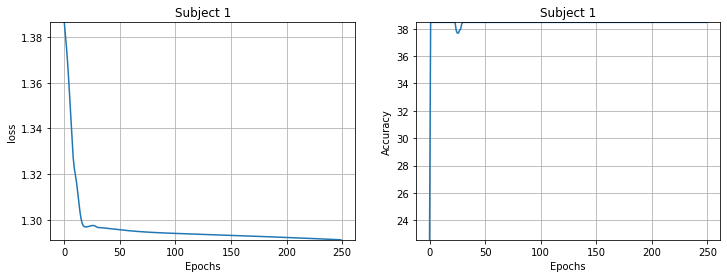

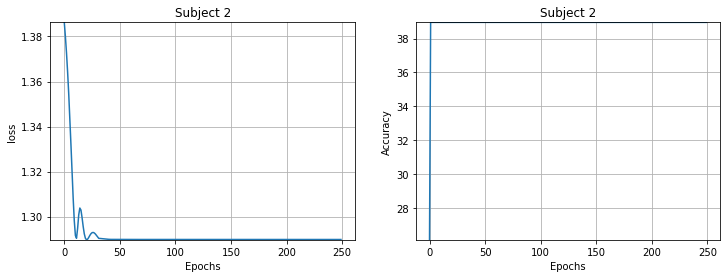

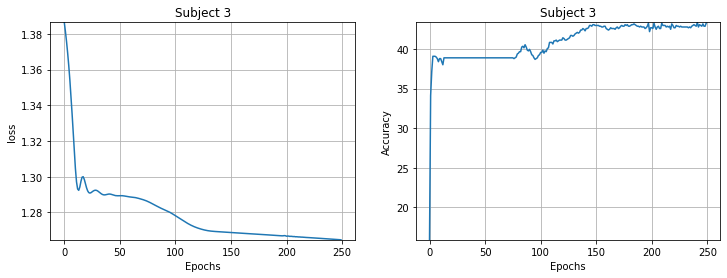

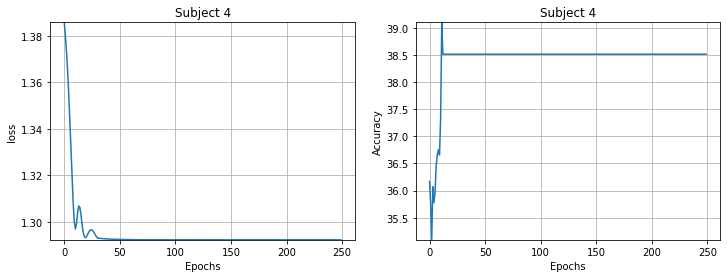

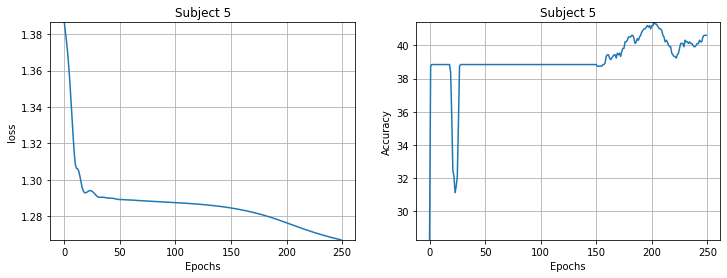

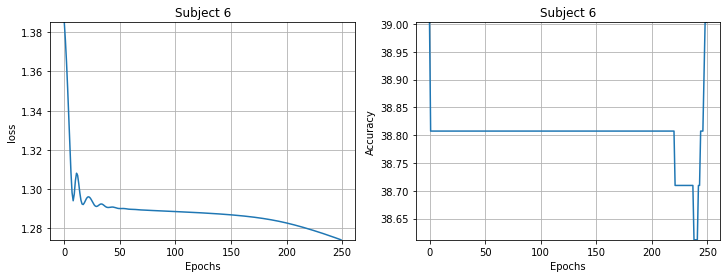

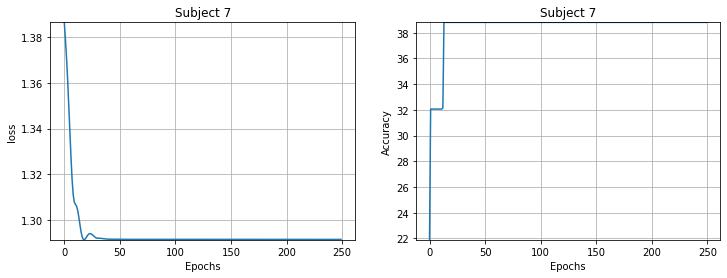

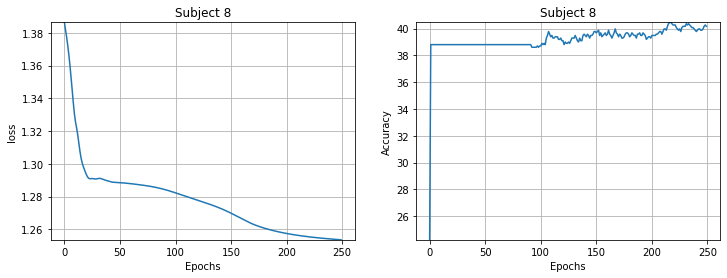

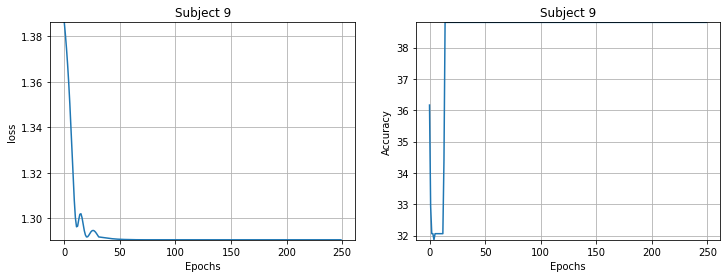

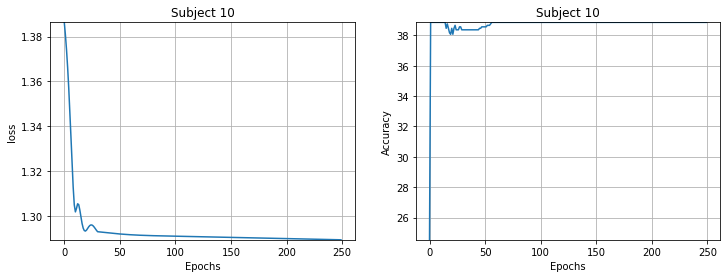

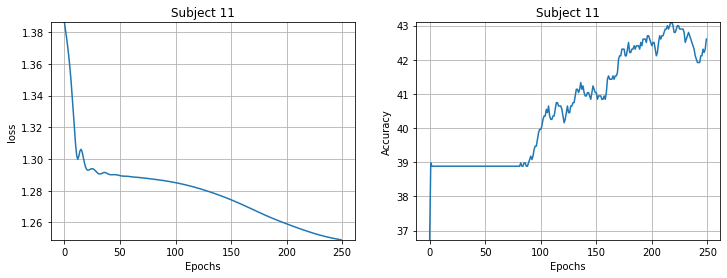

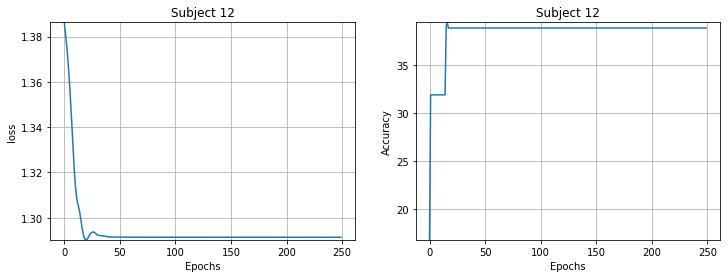

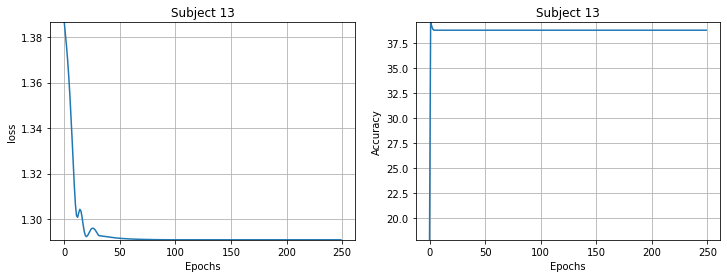

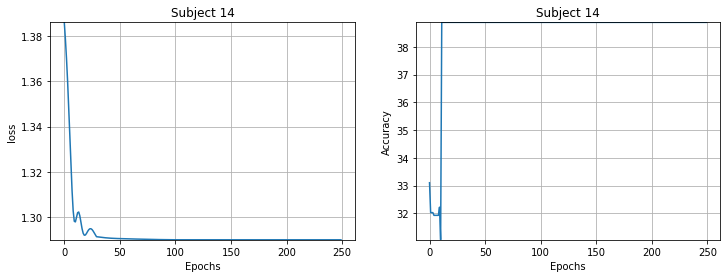

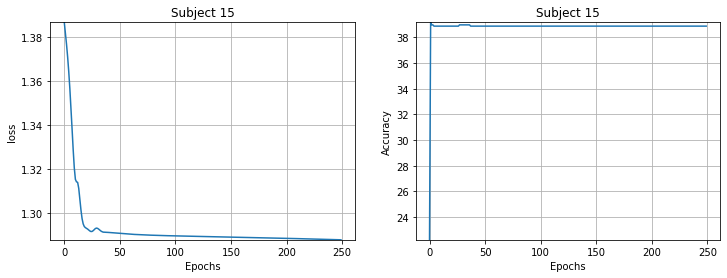

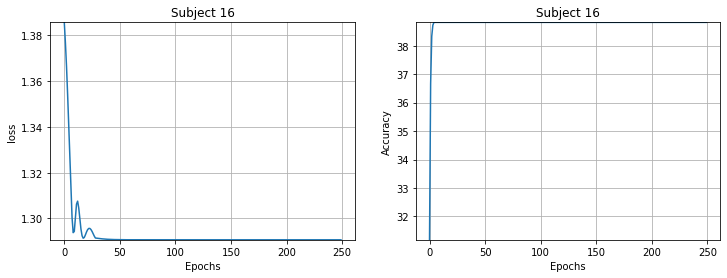

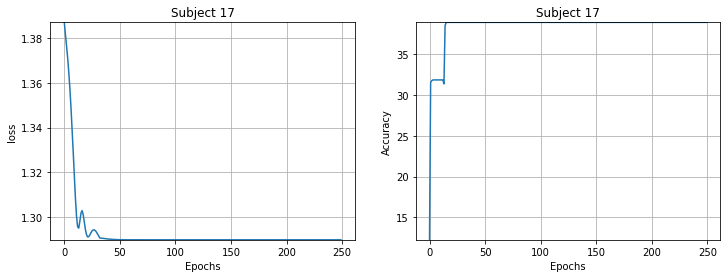

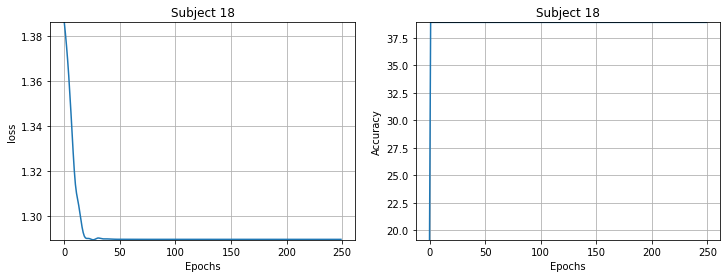

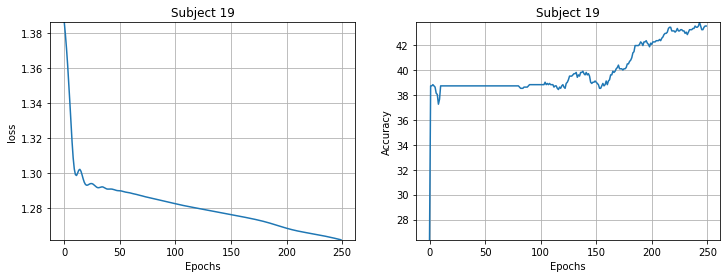

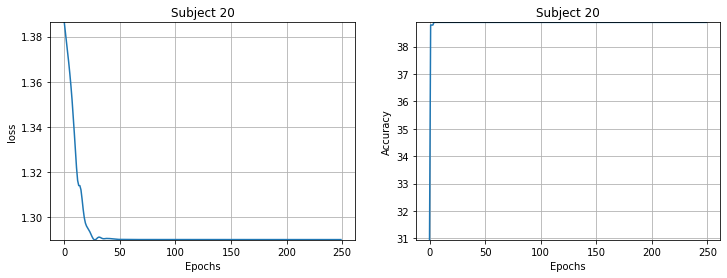

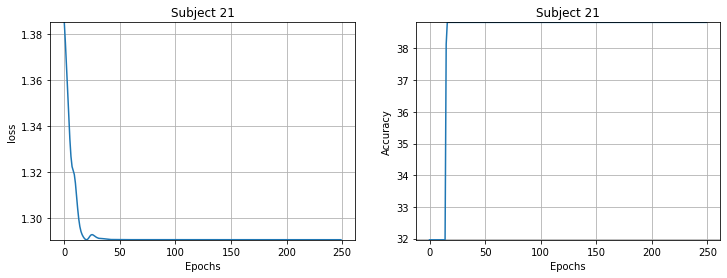

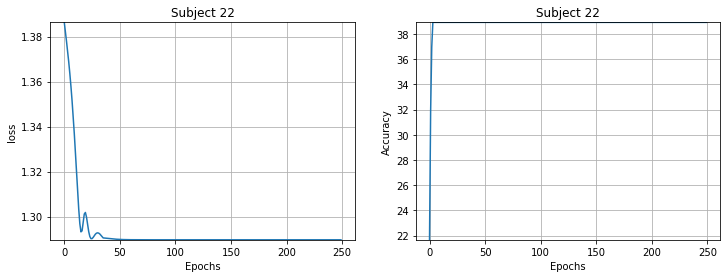

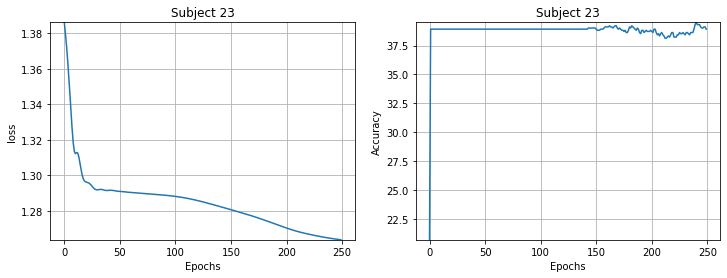

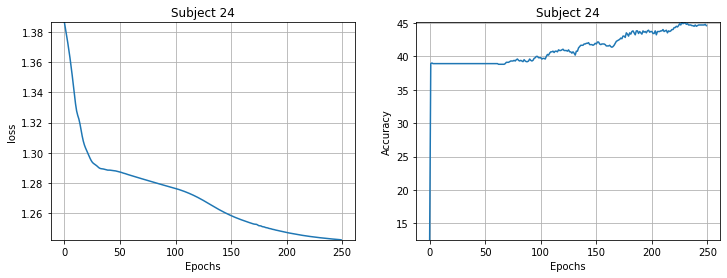

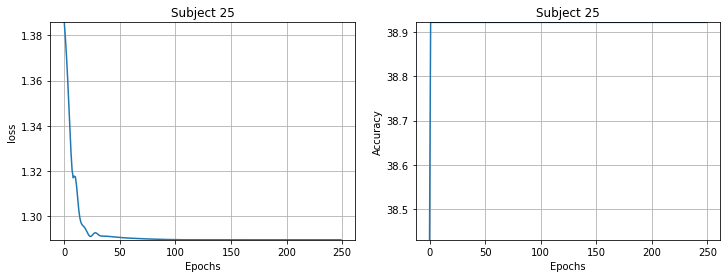

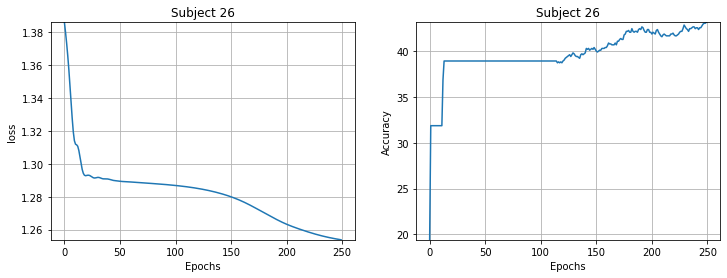

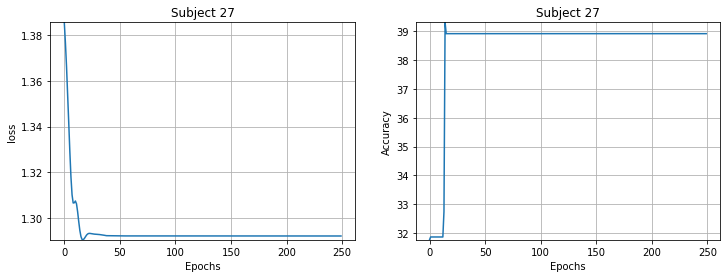

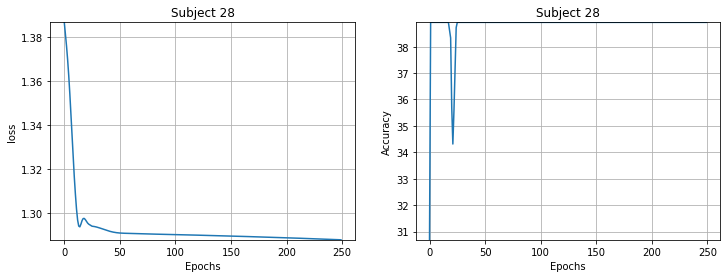

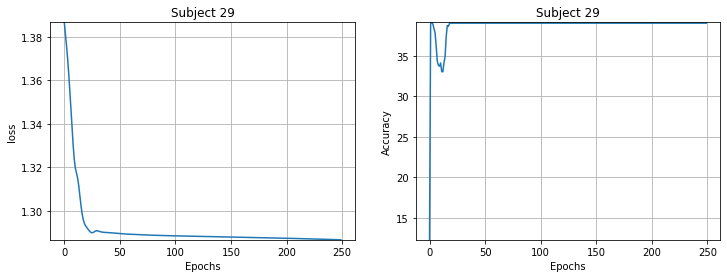

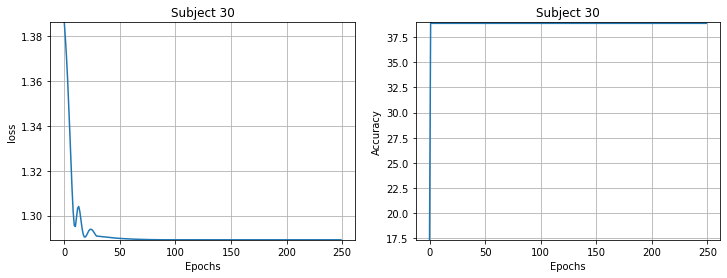

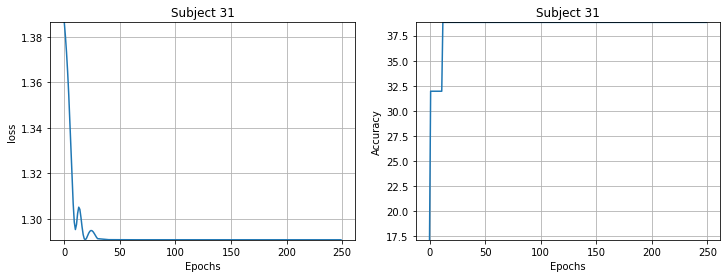

In [ ]:
#tf.keras.backend.clear_session()
import tensorflow as tf

D_ = [12]
Acc = list()
for D in D_:
  for tr in range(31):
    tf.keras.backend.clear_session()
    EEGGC_Net = EEGGC_Net_model(4,int(XT2_.shape[1]),int(XT2_.shape[3]),D=D)
    EEGGC_Net.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                      optimizer=tf.keras.optimizers.Adam(1e-2), 
                      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
    EEGGC_Net.summary()
    ind_tr    = np.ones((XT2_.shape[0])).astype(bool)
    if tr == 0:
      ind_tr[:pos_[tr]] = False 
    else:
      ind_tr[pos_[tr-1]:pos_[tr-1]+pos_[tr]] = False
    ind_te    = np.zeros((XT2_.shape[0])).astype(bool)
    if tr == 0:
      ind_te[:pos_[tr]] = True
    else:
      ind_te[pos_[tr-1]:pos_[tr-1]+pos_[tr]] = True

    x_train = XT2_[ind_tr,:,:,:]
    y_train = tr_cu_[ind_tr,:]
    x_test  = XT2_[ind_te,:,:,:]
    y_test  = tr_cu_[ind_te,:]
    # x_train,x_test,y_train,y_test =  train_test_split(XT2_[ind_te,:,:,:],
    #                                                   tr_cu_[ind_te,:],
    #                                                   test_size=0.3,
    #                                                   random_state=0)

    callbacks = [tf.keras.callbacks.ReduceLROnPlateau('loss', factor=0.1, patience=10, 
                                                      verbose=2, mode='min',  min_lr=1e-6), 
                 tf.keras.callbacks.TerminateOnNaN()]
    history = EEGGC_Net.fit(x_train, y_train, batch_size=x_train.shape[0], epochs=250, 
                            callbacks=callbacks)
    
    fig = plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('Subject '+str(tr+1))
    plt.ylim([min(history.history['loss']), max(history.history['loss'])])
    plt.grid()
    plt.subplot(122)
    acc = np.array(history.history['sparse_categorical_accuracy'])*100
    plt.plot(acc)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Subject '+str(tr+1))
    plt.ylim([acc.min(), acc.max()])
    plt.grid()

    y_pred = np.argmax(EEGGC_Net.predict(x_test), axis=1)
    EEGGC_Net.save_weights('./EEGGC_Net_sbj'+str(tr)+'.h5')
    Acc.append(np.round((np.sum(y_test[:,0] == y_pred)/y_test.shape[0])*100, 1))
    print('acc train = ', round(history.history['sparse_categorical_accuracy'][-1]*100, 1), '%') #sbj 8
    print('acc test = ',np.round((np.sum(y_test[:,0] == y_pred)/y_test.shape[0])*100, 1), '%')

folder_path_ = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2'
from scipy.io import savemat
savemat(folder_path_+'/acc_sujetos_Gnn.mat',{'Acc':Acc})


In [ ]:
folder_path_ = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2'
from scipy.io import savemat
savemat(folder_path_+'/acc_sujetos_Gnn.mat',{'Acc':Acc})

In [ ]:
folder_path_ = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2'
from scipy.io import loadmat
Acc = loadmat(folder_path_+'/acc_sujetos_Gnn.mat')['Acc']

In [ ]:
Acc

In [ ]:
subs= np.arange(1,32,1)
val = np.flip(np.sort(Acc[:]))
pos_1= np.flip(np.argsort(Acc[:]))
pos_1

array([[ 0,  3, 25, 12,  5,  6,  8, 20, 30, 15,  4,  9, 11, 14, 13, 10,
        29, 19, 16, 18, 24, 26, 27, 21,  1, 17, 28,  7, 22,  2, 23]])

In [ ]:
folder_path_ = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2'
corr_1 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_1_CCA_plv_gauss_(1).mat')['corr_cca_ch'])
corr_2 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_3_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_3 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_6_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_4 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_12_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_5 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_24_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_6 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_48_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
Corr_17 = [corr_1,corr_2,corr_3,corr_4,corr_5,corr_6]

corr_1 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_1_CCA_plv_gauss_(1).mat')['corr_cca_ch'])
corr_2 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_3_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_3 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_6_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_4 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_12_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_5 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_24_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_6 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_48_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
Corr_16= [corr_1[:,:16],corr_2[:,:16],corr_3[:,:16],corr_4[:,:16],corr_5[:,:16],corr_6[:,:16]]

corr_1 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_1_CCA_plv_gauss_(1).mat')['corr_cca_ch'])
corr_2 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_3_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_3 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_6_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_4 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_12_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_5 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_24_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_6 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_48_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
Corr_15= [corr_1[:,:15],corr_2[:,:15],corr_3[:,:15],corr_4[:,:15],corr_5[:,:15],corr_6[:,:15]]

corr_1 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_1_CCA_plv_gauss_(1).mat')['corr_cca_ch'])
corr_2 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_3_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_3 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_6_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_4 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_12_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_5 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_24_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
corr_6 = np.squeeze(loadmat(folder_path_+'/Resultado_CKA_48_CCA_plv_gauss_ch17.mat')['corr_cca_ch'])
Corr_14= [corr_1[:,:14],corr_2[:,:14],corr_3[:,:14],corr_4[:,:14],corr_5[:,:14],corr_6[:,:14]]


In [ ]:
r = np.mean(np.asarray(Corr_14),axis=2)
r2 = r[-1,:]
r2_= r[3,:] 

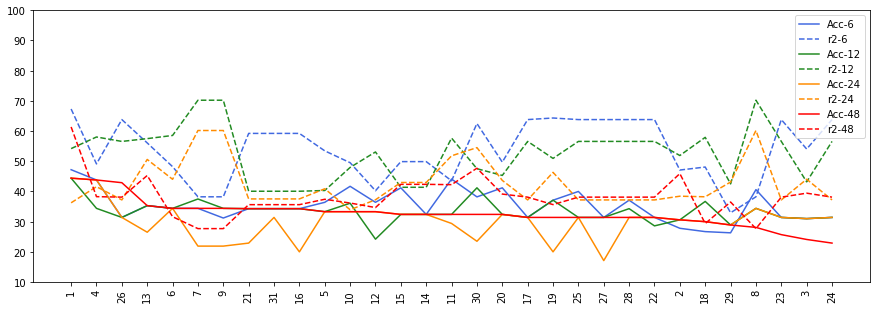

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
folder_path_ = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2'

# r2
r = np.mean(np.asarray(Corr_14),axis=2)
#figure
plt.figure(figsize=(15,5))
# Acc
k = 48
Acc = loadmat(folder_path_+'/acc_sujetos_Gnn_k'+str(k)+'.mat')['Acc']
subs= np.arange(1,32,1)
val = np.flip(np.sort(Acc[:]))
pos_1= np.flip(np.argsort(Acc[:]))
pos_1
col = ['royalblue','forestgreen','darkorange','red']
k_ = [6,12,24,48]
r_cua = [2,3,4,5]
po = 0
for k in k_:
  Acc = loadmat(folder_path_+'/acc_sujetos_Gnn_k'+str(k)+'.mat')['Acc'].ravel()
  plt.plot(Acc[pos_1.ravel()],color=col[po])
  plt.plot(r[r_cua[po],pos_1.ravel()]*100,color=col[po],linestyle='dashed')
  po+=1
  #plt.plot(r2[pos_1.ravel()]*100,color='orange')
  #plt.plot(r2_[pos_1.ravel()]*100,color='orange',linestyle='dashed')
plt.xticks(list(np.arange(0,31,1)),list(subs[pos_1.ravel()]),rotation=90)
plt.legend(['Acc-6','r2-6','Acc-12','r2-12','Acc-24','r2-24','Acc-48','r2-48'])
plt.ylim([10,100])
plt.show()

In [ ]:
# figure
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'
from scipy.io import loadmat
import numpy as np
# info = {'zxttrain': zxtt,
#           'zxttest': zxtet,
#           'rho': rho,
#           'acc_train': np.mean(grid.cv_results_['mean_test_score']),
#           'acc_validacion': accuracy          
#           }
tr = 0
Nch = 17
k = 24


acc_ = list()
xtes = list()
xtra = list()
for tr in range(31): 
  acc_.append(loadmat(load_path+'clasification_sub'+str(tr+1)+'chans'+str(Nch)+'k'+str(k)+'.mat')['acc_validacion'])
  xtes.append(loadmat(load_path+'clasification_sub'+str(tr+1)+'chans'+str(Nch)+'k'+str(k)+'.mat')['zxttest'])
  xtra.append(loadmat(load_path+'clasification_sub'+str(tr+1)+'chans'+str(Nch)+'k'+str(k)+'.mat')['zxttrain'])
acc_ = np.squeeze(acc_)

In [ ]:
from sklearn.decomposition import PCA

folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
tr_cu      = loadmat(folder_path+'/Trials_cuadrantes.mat')['trial_ord']
tr_1 = tr_cu==1
tr_2 = tr_cu==2
tr_3 = tr_cu==3
tr_4 = tr_cu==4
tr_all = tr_1+tr_2+tr_3+tr_4
ind_all = np.reshape(tr_all,(tr_all.shape[0]*tr_all.shape[1]))

tr_cu_ = np.reshape(tr_cu,(tr_cu.shape[0]*tr_cu.shape[1]))
tr_cu_ = tr_cu_[ind_all].reshape(-1,1)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = list()
sil = list()

ind_s = np.arange(0,1240,40)
acc = list()
pred = list()
pos_ = np.sum(tr_all,axis=1)

for tr in range(31):
  ind_tr    = np.ones((1055)).astype(bool)
  if tr == 0:
    ind_tr[:pos_[tr]] = False 
  else:
    ind_tr[pos_[tr-1]:pos_[tr-1]+pos_[tr]] = False
  ind_te    = np.zeros((1055)).astype(bool)
  if tr == 0:
    ind_te[:pos_[tr]] = True
  else:
    ind_te[pos_[tr-1]:pos_[tr-1]+pos_[tr]] = True
  
  zx = PCA(n_components=3, random_state=0).fit_transform(xtes[tr])
  xz_ =KMeans(n_clusters=4, random_state=0,init='k-means++').fit(zx,tr_cu_[ind_te])
  inertia.append(xz_.inertia_)
  sil.append(silhouette_score(zx,tr_cu_[ind_te]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
val_med = np.mean(np.asarray([inertia,sil]),axis=0)


In [ ]:
# donde  N_chan  son 14,15,16,17
folder_path_= "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here

N_chan = 17
Corr_17 = np.load(folder_path_+'/corr_plv_gauss_'+str(N_chan)+'_canalesV2.npy')
N_chan = 16
Corr_16 = np.load(folder_path_+'/corr_plv_gauss_'+str(N_chan)+'_canalesV2.npy')
N_chan = 15
Corr_15 = np.load(folder_path_+'/corr_plv_gauss_'+str(N_chan)+'_canalesV2.npy')
N_chan = 14
Corr_14 = np.load(folder_path_+'/corr_plv_gauss_'+str(N_chan)+'_canalesV2.npy')


In [ ]:
r = np.mean(np.mean(np.abs(Corr_17),axis=-1),axis=0)*100

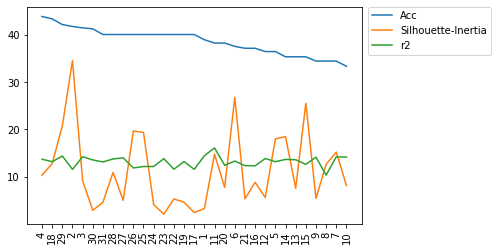

In [ ]:
import matplotlib.pyplot as plt
plt.plot(val)
plt.plot(np.abs(val_med[pos_1].reshape(-1,1)*100))
plt.plot(r[pos_1].reshape(-1,1))
#plt.plot(acc_[pos_1].reshape(-1,1)*100)
plt.xticks(list(np.arange(0,31,1)),list(subs[pos_1]),rotation=90)

#plt.ylim([0,0.6])
plt.legend(['Acc','Silhouette-Inertia','r2'],bbox_to_anchor=(1.02, 1),loc='upper left', borderaxespad= 0)
plt.show()

In [ ]:
y_test.shape

(35, 1)

In [ ]:
y_pred.shape

(36,)

In [ ]:
x_train.shape

(1019, 14, 14, 2)

In [ ]:
x_test.shape

(36, 14, 14, 2)

In [ ]:
np.unique(y_train)

array([0., 1., 2., 3.])

In [ ]:
np.unique(y_test)

array([0., 1., 2., 3.])

PENDIENTE: VALIDACIÓN (1 HOLD OUT VS NO SE CUANDO ENTRENA BIEN)

In [ ]:
EEGGC_Net.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-2), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau('loss', factor=0.1, patience=10, verbose=2, mode='min',  min_lr=1e-6), tf.keras.callbacks.TerminateOnNaN()]
history = EEGGC_Net.fit(X_train, y_train, batch_size=X_train.shape[0], epochs=500, callbacks=callbacks)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 1.4552 - sparse_categorical_accuracy: 0.2500 - lr: 0.0100
Epoch 2/500
1/1 [==============================] - 0s 150ms/step - loss: 1.4207 - sparse_categorical_accuracy: 0.2500 - lr: 0.0100
Epoch 3/500
1/1 [==============================] - 0s 140ms/step - loss: 1.4043 - sparse_categorical_accuracy: 0.2500 - lr: 0.0100
Epoch 4/500
1/1 [==============================] - 0s 133ms/step - loss: 1.3867 - sparse_categorical_accuracy: 0.2465 - lr: 0.0100
Epoch 5/500
1/1 [==============================] - 0s 125ms/step - loss: 1.3886 - sparse_categorical_accuracy: 0.2500 - lr: 0.0100
Epoch 6/500
1/1 [==============================] - 0s 136ms/step - loss: 1.3957 - sparse_categorical_accuracy: 0.2500 - lr: 0.0100
Epoch 7/500
1/1 [==============================] - 0s 119ms/step - loss: 1.3933 - sparse_categorical_accuracy: 0.2500 - lr: 0.0100
Epoch 8/500
1/1 [==============================] - 0s 121ms/step - loss: 1.3884 - spar

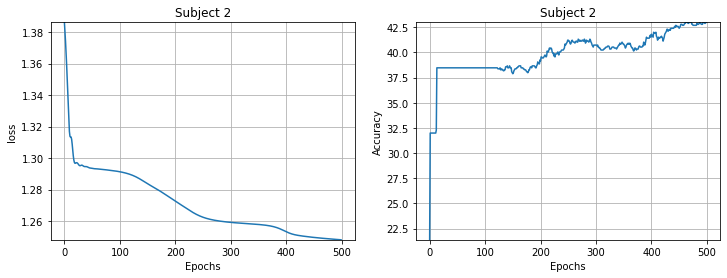

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Subject '+str(2))
plt.ylim([min(history.history['loss']), max(history.history['loss'])])
plt.grid()
plt.subplot(122)
acc = np.array(history.history['sparse_categorical_accuracy'])*100
plt.plot(acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Subject '+str(2))
plt.ylim([acc.min(), acc.max()])
plt.grid()

In [ ]:
y_pred = np.argmax(EEGGC_Net.predict(X_test), axis=1)

In [ ]:
EEGGC_Net.save_weights('./EEGGC_Net_sbj'+str(2)+'.h5')

##sbj 8

In [ ]:
print('acc train = ', round(history.history['sparse_categorical_accuracy'][-1]*100, 1), '%') #sbj 8
print('acc test = ',np.round((np.sum(y_test == y_pred)/y_test.shape[0])*100, 1), '%')

acc train =  78.1 %
acc test =  62.8 %


In [ ]:
## eeg_net 73%

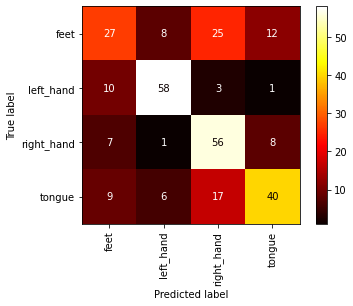

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=classes, cmap='hot', xticks_rotation='vertical') #sbj 8

## sbj 2

In [ ]:
print('acc train = ', round(history.history['sparse_categorical_accuracy'][-1]*100, 1), '%') #sbj 8
print('acc test = ',np.round((np.sum(y_test == y_pred)/y_test.shape[0])*100, 1), '%')

acc train =  52.8 %
acc test =  26.0 %


In [ ]:
# eeg_net %50%

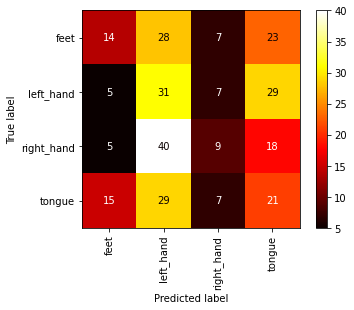

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=classes, cmap='hot', xticks_rotation='vertical') #sbj 8

# Interpretability

In [ ]:
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.filters.git > /dev/null #Module for filters
FILEID = "1Q2LkqVa_lKVhc3XKjpcZufmd7sXDmbrt"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MI_EEG_ClassMeth.zip && rm -rf /tmp/cookies.txt > /dev/null
!unzip MI_EEG_ClassMeth.zip > /dev/null #Package with useful functions for motor imagery classification based in EEG.
!dir

  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.filters.git /tmp/pip-req-build-wa115wnr
--2022-03-08 19:21:52--  https://docs.google.com/uc?export=download&confirm=&id=1Q2LkqVa_lKVhc3XKjpcZufmd7sXDmbrt
Resolving docs.google.com (docs.google.com)... 74.125.195.101, 74.125.195.102, 74.125.195.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tabojcee498s69glo5rmk6v9kdv9a6a3/1646767275000/09711457892284675029/*/1Q2LkqVa_lKVhc3XKjpcZufmd7sXDmbrt?e=download [following]
--2022-03-08 19:21:53--  https://doc-08-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tabojcee498s69glo5rmk6v9kdv9a6a3/1646767275000/09711457892284675029/*/1Q2LkqVa_lKVhc3XKjpcZufmd7sXDmbrt?e=download
Resolving doc-08-60-docs.googleusercontent.com (doc-08-60-docs.googleuserconte

In [ ]:
from scipy.signal import freqz
from MI_EEG_ClassMeth.FeatExtraction import Connectivities

## Sbj 8

In [ ]:
EEGGC_Net.load_weights('./EEGGC_Net_sbj'+str(8)+'.h5')

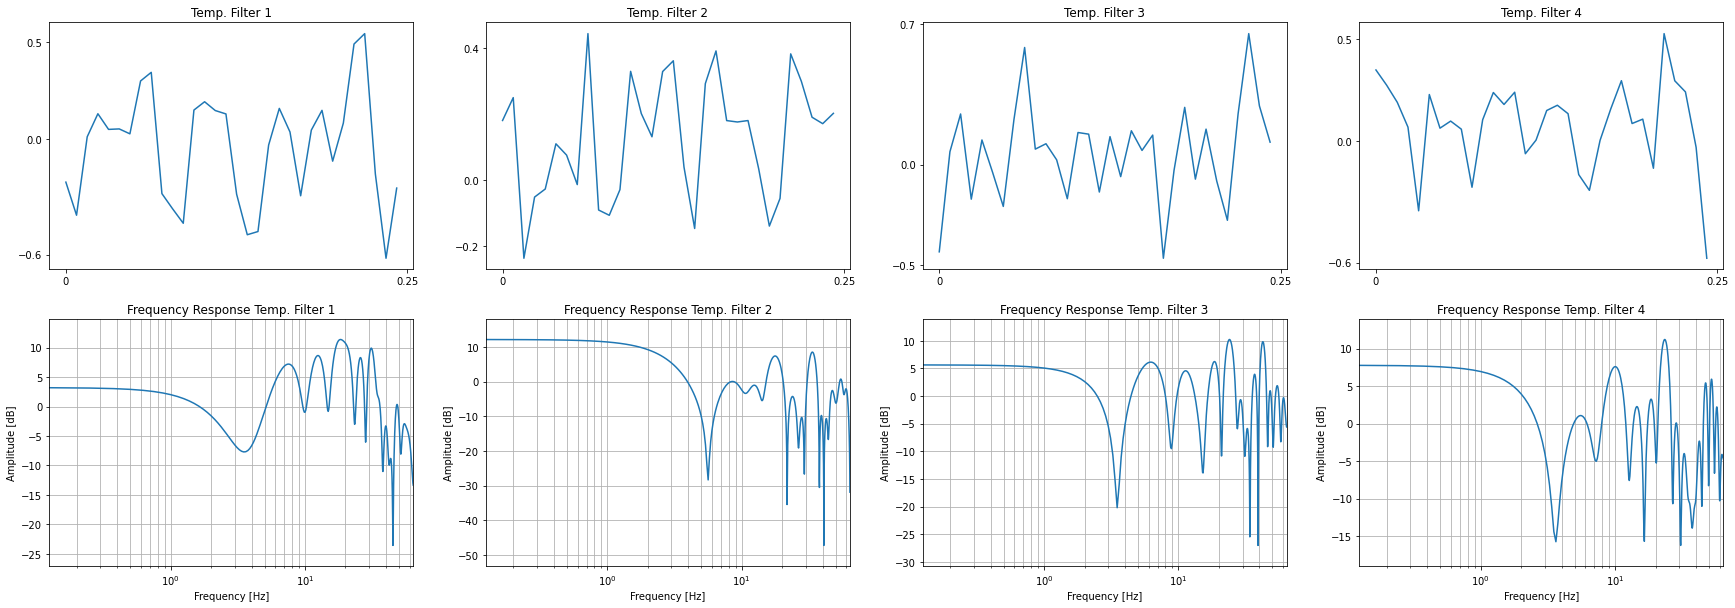

In [ ]:
#Frequencies learned
nyq_rate = info['sfreq'] #sample frequency
fig = plt.figure(figsize=(30,10))
frequency_layer = EEGGC_Net.get_layer('temporal_Conv')
W = frequency_layer.get_weights()[0] #FIR filters coefficientes (1, b, 1, f)
for f in range(W.shape[-1]):
  plt.subplot(2,4,f+1)
  plt.plot(W[0,:,0,f][::-1])
  plt.xticks(ticks=[0,kernLength], labels=[0, round(kernLength*(1/nyq_rate), 2)])
  plt.yticks(ticks=[round(W[0,:,0,f].min(),1), 0, round(W[0,:,0,f].max(),1)])
  plt.title('Temp. Filter '+str(f+1))

  w, h = freqz(W[0,:,0,f][::-1])
  plt.subplot(2,4,f+1+W.shape[-1])
  plt.semilogx((w*nyq_rate)/(2*np.pi), 20*np.log10(abs(h)))
  plt.title('Frequency Response Temp. Filter '+str(f+1))
  plt.xlabel('Frequency [Hz]')
  plt.ylabel('Amplitude [dB]')
  plt.margins(0, 0.1)
  plt.grid(which='both', axis='both')
plt.show()

- TEMP FILTER 1: Not clear the number of cycles (?)
- TEMP FILTER 2: Not clear the number of cycles (?)
- TEMP FILTER 3: Not clear the number of cycles (?)
- TEMP FILTER 4: 5 cycles (20 Hz)

Note: I don`t understand the frequency response of the filters, Is the way like I get the filter coeeficients OK [::-1], Is it the scale of plots in logs scale OK?

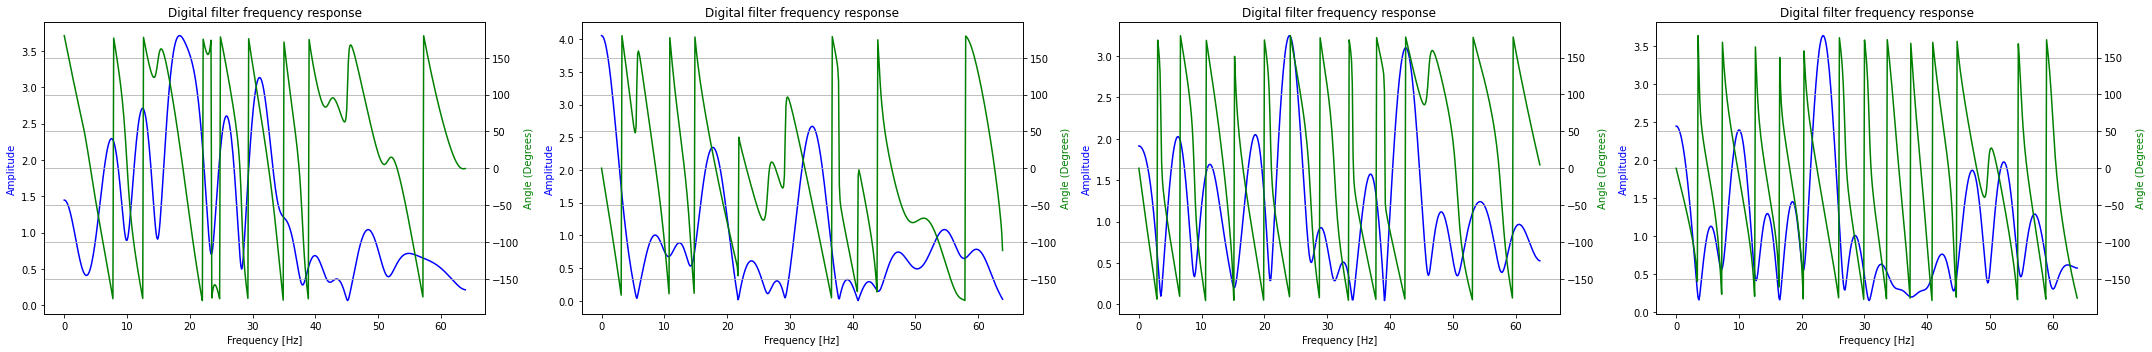

In [ ]:
#Frequencies learned
nyq_rate = info['sfreq'] #sample frequency
fig, axs = plt.subplots(1,4, figsize=(30,5))
frequency_layer = EEGGC_Net.get_layer('temporal_Conv')
W = frequency_layer.get_weights()[0] #FIR filters coefficientes (1, b, 1, f)
for f in range(W.shape[-1]):
  w, h = freqz(W[0,:,0,f][::-1])
  axs[f].set_title('Digital filter frequency response')
  axs[f].plot((w*nyq_rate)/(2*np.pi), abs(h), 'b')
  axs[f].set_ylabel('Amplitude', color='b')
  axs[f].set_xlabel('Frequency [Hz]')
  ax2 = axs[f].twinx()
  angles = np.angle(h, deg=True)
  ax2.plot((w*nyq_rate)/(2*np.pi), angles, 'g')
  ax2.set_ylabel('Angle (Degrees)', color='g')
  ax2.grid()
  ax2.axis('tight')
fig.tight_layout()
plt.show()

I don't understand or I don`t ge to interpret the magnitude response of the filter, In the phase response there are interesting period patterns that I don not how to explain.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 22, 448, 1)]      0         
                                                                 
 temporal_Conv (Conv2D)      (None, 22, 448, 4)        128       
                                                                 
 pearson_Cxx (Lambda)        (None, 22, 22, 4)         0         
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


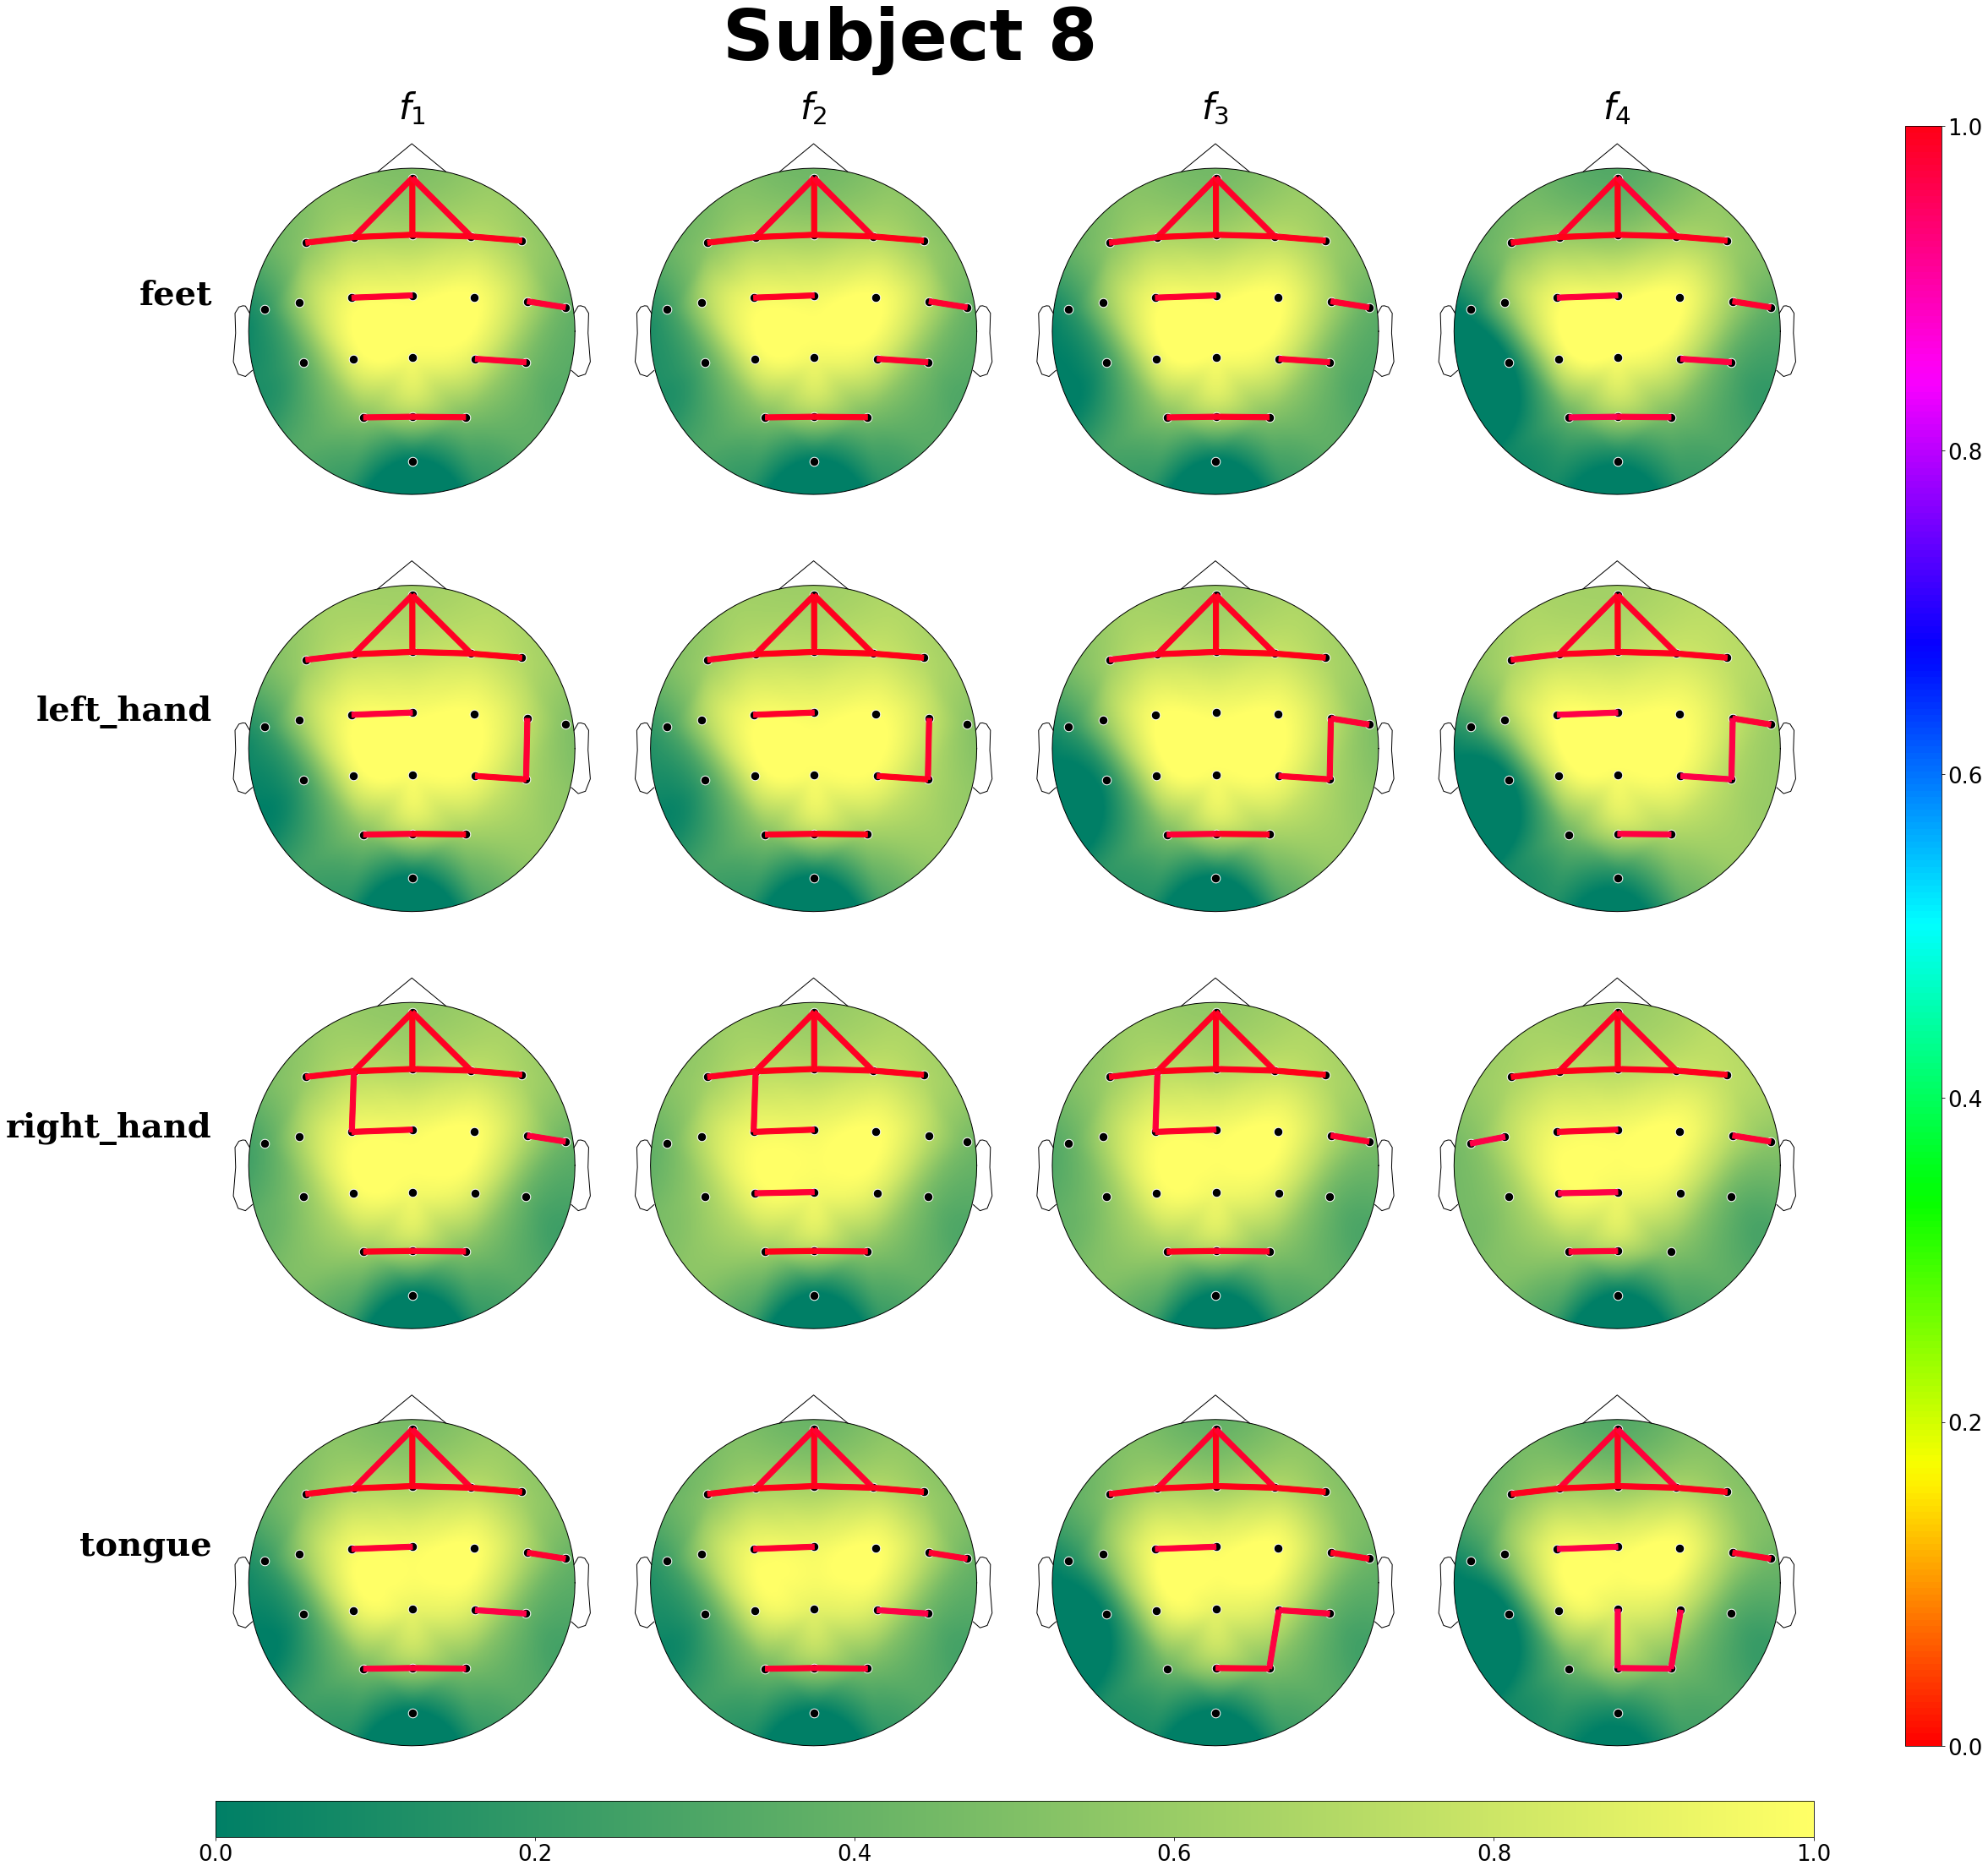

In [ ]:
#Connectivities by each frequency band
pearson_model = tf.keras.models.Model(inputs=[EEGGC_Net.inputs], outputs=[EEGGC_Net.get_layer('pearson_Cxx').output])
pearson_model.summary()
pearson_connectivities = np.abs(pearson_model.predict(X_test)) #(batch_size, ch, ch, frequency_filters)
utri_ind =  np.triu_indices(pearson_connectivities.shape[1], 1)

con = Connectivities(sfreq=info['sfreq'], f_bank=np.zeros((F,2)), vwt=np.zeros((len(classes),2))) #class for plotting connectivites

w_label = []
mean_pearson_connectivity_class = np.zeros((pearson_connectivities.shape[1], pearson_connectivities.shape[2], len(classes), pearson_connectivities.shape[-1]))

for cls, cls_id in mapping_classes.items():
  w_label.append(cls)
  mean_pearson_connectivity_class[:,:,cls_id,:] = pearson_connectivities[y_test==cls_id].mean(axis=0)
  
con.plot_connectivities(mean_pearson_connectivity_class[utri_ind[0],utri_ind[1],:,:].reshape(-1), info,  channels_names=info['ch_names'], thr=95, type_of_normalization='individual', montage='standard_1005', 
                        fig_title='Subject '+str(8), fb_label=[r'$f_1$', r'$f_2$', r'$f_3$', r'$f_4$'], w_label=w_label,
                        labels_params = {'ylabel_fonfamily':'serif', 'ylabel_fontsize':40, 'ylabel_weight':1000, 'xlabel_fonfamily':'serif', 'xlabel_fontsize':42, 'xlabel_weight':500, 'rotation':0, 'cl_size':26},
                        relevant_channels=False, plot_channels_names=False, figsize=(30,30), cmap_connectivities='hsv', cmap_tplt='summer',
                        show=True, save=False, path='Pearson_Cxx_'+str(8), format='pdf')

In [ ]:
(np.sum(pearson_connectivities > 0.85)/pearson_connectivities.size)*100

47.615358126721766

The majority of the functional connectivities get high values, the 48% of the connectivities are greater than 0.85. This means that the majoriy of channels are very similar. The channel Fz is important. The connectivities are locals (in work memory tasks (not)) and almost all main frequencies are in the sensorimot region.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 22, 448, 1)]      0         
                                                                 
 temporal_Conv (Conv2D)      (None, 22, 448, 4)        128       
                                                                 
 pearson_Cxx (Lambda)        (None, 22, 22, 4)         0         
                                                                 
 channel_embedding (Depthwis  (None, 22, 1, 8)         176       
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 2, 1, 88)          0         
                                                                 
 graph_embedding (Conv2D)    (None, 2, 1, 4)           88        
                                                           

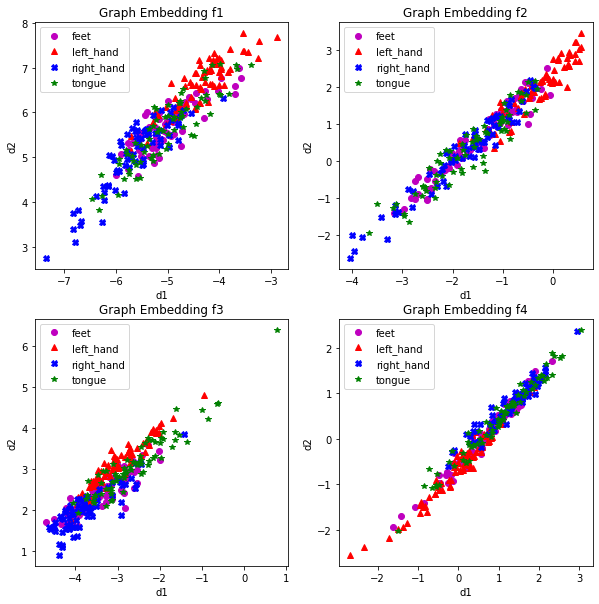

In [ ]:
#Graph embedding for every frequency band
graph_embedding_model = tf.keras.models.Model(inputs=[EEGGC_Net.inputs], outputs=[EEGGC_Net.get_layer('graph_embedding').output])
graph_embedding_model.summary()
graph_embeddings = graph_embedding_model.predict(X_test) #(batch_size, D, 1, frequency_filters)
plt.figure(figsize=(10,10))
for f in range(graph_embeddings.shape[-1]):
  plt.subplot(2,2,f+1)
  for cls_info, cls_stl in zip(mapping_classes.items(), ['om', '^r', 'Xb', '*g']):
    plt.plot(graph_embeddings[:,0,0,f][y_test==cls_info[1]], graph_embeddings[:,1,0,f][y_test==cls_info[1]], cls_stl, label=cls_info[0])
  plt.title('Graph Embedding f'+str(f+1))
  plt.xlabel('d1')
  plt.ylabel('d2')
  plt.legend()

- The embedding graphs of tongue and feet classes are not too discrimtive. Only in frequency 3 we see something.

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 22, 448, 1)]      0         
                                                                 
 temporal_Conv (Conv2D)      (None, 22, 448, 4)        128       
                                                                 
 pearson_Cxx (Lambda)        (None, 22, 22, 4)         0         
                                                                 
 channel_embedding (Depthwis  (None, 22, 1, 8)         176       
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 2, 1, 88)          0         
                                                                 
 graph_embedding (Conv2D)    (None, 2, 1, 4)           88        
                                                           

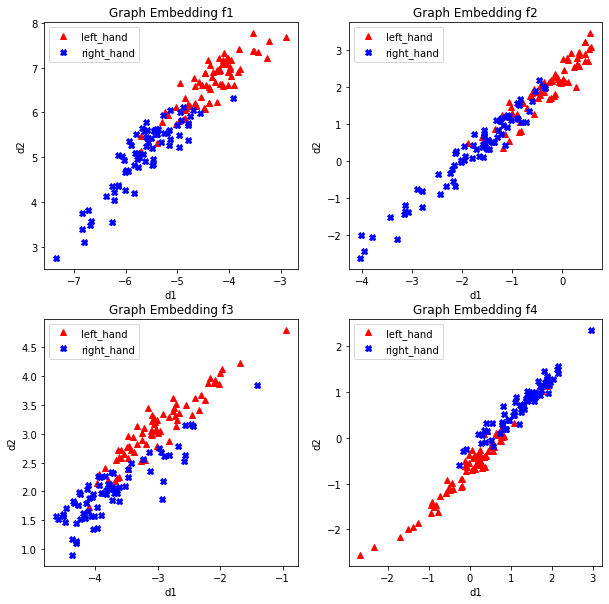

In [ ]:
#Graph embedding for every frequency band (left hand vs right hand)
graph_embedding_model = tf.keras.models.Model(inputs=[EEGGC_Net.inputs], outputs=[EEGGC_Net.get_layer('graph_embedding').output])
graph_embedding_model.summary()
graph_embeddings = graph_embedding_model.predict(X_test) #(batch_size, D, 1, frequency_filters)
plt.figure(figsize=(10,10))
for f in range(graph_embeddings.shape[-1]):
  plt.subplot(2,2,f+1)
  for cls_info, cls_stl in zip([('left_hand',1),('right_hand',2)], ['^r', 'Xb']):
    plt.plot(graph_embeddings[:,0,0,f][y_test==cls_info[1]], graph_embeddings[:,1,0,f][y_test==cls_info[1]], cls_stl, label=cls_info[0])
  plt.title('Graph Embedding f'+str(f+1))
  plt.xlabel('d1')
  plt.ylabel('d2')
  plt.legend()

For left hand vs right hand, the graph embeddings  in all frequencies bands are discrimative. 

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 22, 448, 1)]      0         
                                                                 
 temporal_Conv (Conv2D)      (None, 22, 448, 4)        128       
                                                                 
 pearson_Cxx (Lambda)        (None, 22, 22, 4)         0         
                                                                 
 channel_embedding (Depthwis  (None, 22, 1, 8)         176       
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 2, 1, 88)          0         
                                                                 
 graph_embedding (Conv2D)    (None, 2, 1, 4)           88        
                                                           

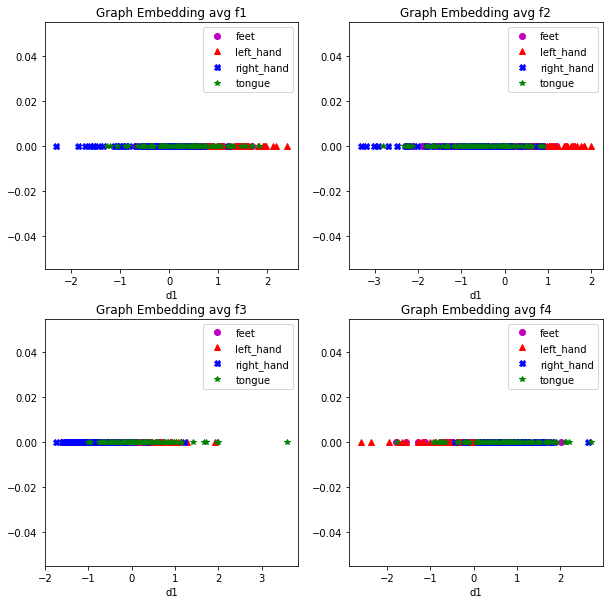

In [ ]:
#Mean of graph embedding for every frequency band
graph_embedding_avg_model = tf.keras.models.Model(inputs=[EEGGC_Net.inputs], outputs=[EEGGC_Net.get_layer('avg_graph_embedding').output])
graph_embedding_avg_model.summary()
graph_embeddings_avg = graph_embedding_avg_model.predict(X_test) #(batch_size, frequency_filters)
plt.figure(figsize=(10,10))
for f in range(graph_embeddings_avg.shape[-1]):
  plt.subplot(2,2,f+1)
  for cls_info, cls_stl in zip(mapping_classes.items(), ['om', '^r', 'Xb', '*g']):
    plt.plot(graph_embeddings_avg[:,f][y_test==cls_info[1]], np.zeros(graph_embeddings_avg[:,f][y_test==cls_info[1]].shape[0]) , cls_stl, label=cls_info[0])
  plt.title('Graph Embedding avg f'+str(f+1))
  plt.xlabel('d1')
  plt.legend()

In [ ]:
#Plot space of mean of graph embedding (Separability of trials)
from sklearn.decomposition import PCA

In [ ]:
#Mean of graph embedding for every frequency band
graph_embedding_avg_model = tf.keras.models.Model(inputs=[EEGGC_Net.inputs], outputs=[EEGGC_Net.get_layer('avg_graph_embedding').output])
graph_embedding_avg_model.summary()
graph_embeddings_avg = graph_embedding_avg_model.predict(X_test) #(batch_size, frequency_filters)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 22, 448, 1)]      0         
                                                                 
 temporal_Conv (Conv2D)      (None, 22, 448, 4)        128       
                                                                 
 pearson_Cxx (Lambda)        (None, 22, 22, 4)         0         
                                                                 
 channel_embedding (Depthwis  (None, 22, 1, 8)         176       
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 2, 1, 88)          0         
                                                                 
 graph_embedding (Conv2D)    (None, 2, 1, 4)           88        
                                                           

In [ ]:
pca = PCA(n_components=2)

In [ ]:
geavg_pca = pca.fit_transform(graph_embeddings_avg)

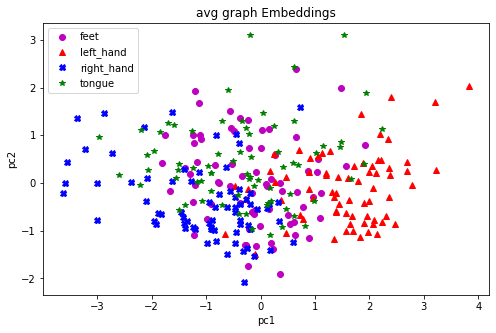

In [ ]:
#all classes 
fig = plt.figure(figsize=(8,5))
for cls_info, cls_stl in zip(mapping_classes.items(), ['om', '^r', 'Xb', '*g']):
  plt.plot(geavg_pca[:,0][y_test==cls_info[1]], geavg_pca[:,1][y_test==cls_info[1]], cls_stl, label=cls_info[0])
plt.title('avg graph Embeddings')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(loc=2)

feet and tongue classes are not discrimative, left hand id to right and right hand to the left (discriminability)

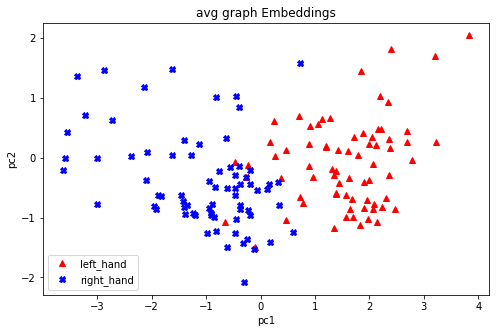

In [ ]:
#lef hand vs right hand
fig = plt.figure(figsize=(8,5))
for cls_info, cls_stl in zip([('left_hand',1),('right_hand',2)], ['^r', 'Xb']):
  plt.plot(geavg_pca[:,0][y_test==cls_info[1]], geavg_pca[:,1][y_test==cls_info[1]], cls_stl, label=cls_info[0])
plt.title('avg graph Embeddings')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(loc=3)

left vs right hand continues to be discrimanite for the NN after the GAP layer, specially in component 1

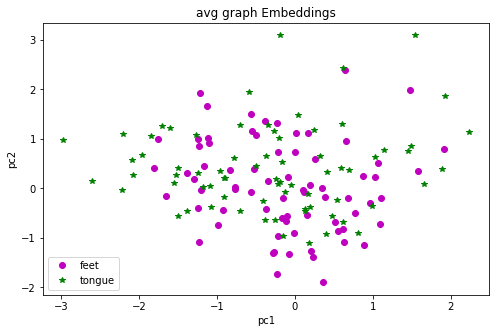

In [ ]:
#feet vs tongue
fig = plt.figure(figsize=(8,5))
for cls_info, cls_stl in zip([('feet',0),('tongue',3)], ['om', '*g']):
  plt.plot(geavg_pca[:,0][y_test==cls_info[1]], geavg_pca[:,1][y_test==cls_info[1]], cls_stl, label=cls_info[0])
plt.title('avg graph Embeddings')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(loc=3)

feet and tongue classes are not discriminative 

Text(0.5, 1.0, 'Relevance Analysis')

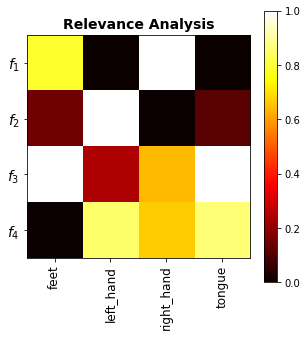

In [ ]:
#Importance of each frequency band by the predicted class
dense_layer = EEGGC_Net.get_layer('dense')
W, b = dense_layer.get_weights()
W = np.abs(W)
W_norm = (W - W.min(axis=0, keepdims=True))/(W.max(axis=0, keepdims=True) - W.min(axis=0, keepdims=True))
fig = plt.figure(figsize=(5,5))
plt.imshow(W_norm, cmap='hot')
plt.xticks(ticks=range(0,W_norm.shape[-1]), labels=classes, rotation=90, size=12)
plt.yticks(ticks=range(0,W_norm.shape[0]), labels=[r'$f_' + str(f+1) + '$' for f in range(W_norm.shape[0])], size=14)
plt.colorbar()
plt.title('Relevance Analysis', fontdict={'fontsize':14, 'fontweight':'bold'})

For tongue the f3 frequency is the most discriminative, for right hand f1,f4 and f3 are discrimantive in descendet order, for left hand f2 and f4 are discriminative, for feet f3 and f1 are discrimative.

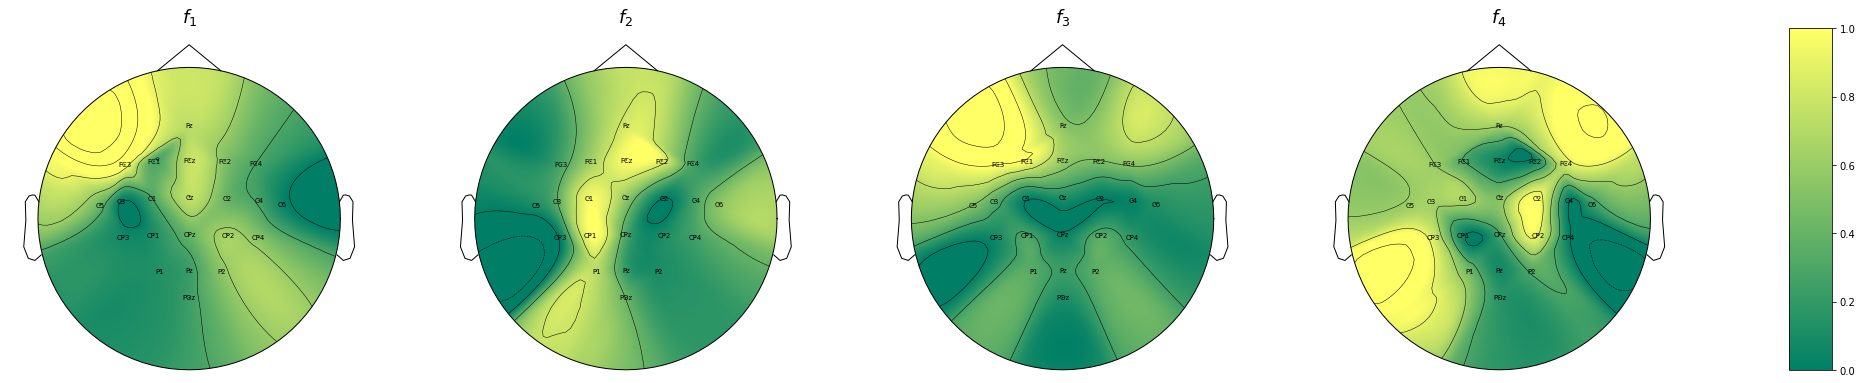

In [ ]:
#Importance of channels embeddings for graph embedding (by frequncies)
graph_embedding_layer = EEGGC_Net.get_layer('graph_embedding')
W = graph_embedding_layer.get_weights()[0]
W = np.abs(W[0,0,:,:])
W_norm = (W - W.min(axis=0, keepdims=True))/(W.max(axis=0, keepdims=True) - W.min(axis=0, keepdims=True))
fig, axs = plt.subplots(1,4, squeeze=False, figsize=(30,15))
for f in range(W_norm.shape[-1]):
  plot_topomap(W_norm[:,f], info, vmin=0, vmax=1, cmap='summer', names=info['ch_names'], show_names=True, contours=5, axes=axs[0,f], show=False)
  title = r'$f_' + str(f+1) + '$'
  axs[0,f].set_title(title, fontdict={'fontsize':18, 'fontweight':'bold'})

cax=fig.add_axes([axs[-1,-1].get_position().x1 + 0.05,axs[-1,-1].get_position().y0,0.02,axs[0,-1].get_position().y1-axs[-1,-1].get_position().y0])
#Mappeable objects for topomaps colorbar
sm = plt.cm.ScalarMappable(cmap='summer')
sm.set_array(W_norm.ravel())
cbar = fig.colorbar(sm, cax=cax)
for t in cbar.ax.get_xticklabels():
    t.set_fontsize(12)

Analysis: 
- Frequency 2 and 4 shows a high activity in channels of sensorimotor region, in frequency 2 all the activity is in channels c1,cp1 and fcz while in f4 the main channels are fc4,c2,cp2 and cp3 (all these channels are in the central region wehere we wave part of the motor cortex assocaited to motor imagery taks) 
- In frequency 3 the main information is in fc3 and fc1. The rest of the info is turn off
- In frequency 1 the main activity is in fc3, with some activty in channels like Fcz, Cz, Cp2 and Cp4.
- The activity of occitpital and parietal lobules is almost null, there is too few activity in temporal region of f1,f3 and f4. In the frontal area threre is activity in f4,f3 and f1.

In almos all the frequencies the main channels to create the embedding graphs are the channels of the central zone, this zone is asocciated to motor imagery activity. Too few impact of other regions,this leads to the conclusion that the model focus in the brain activity associated to motor imagery task and ommit the artifacts and visual stimulus.

¿It is OK to show this like the importance of the channels in each frequency band, by the reason of graph embedding?

## Sbj 2

In [ ]:
EEGGC_Net.load_weights('./EEGGC_Net_sbj'+str(2)+'.h5')

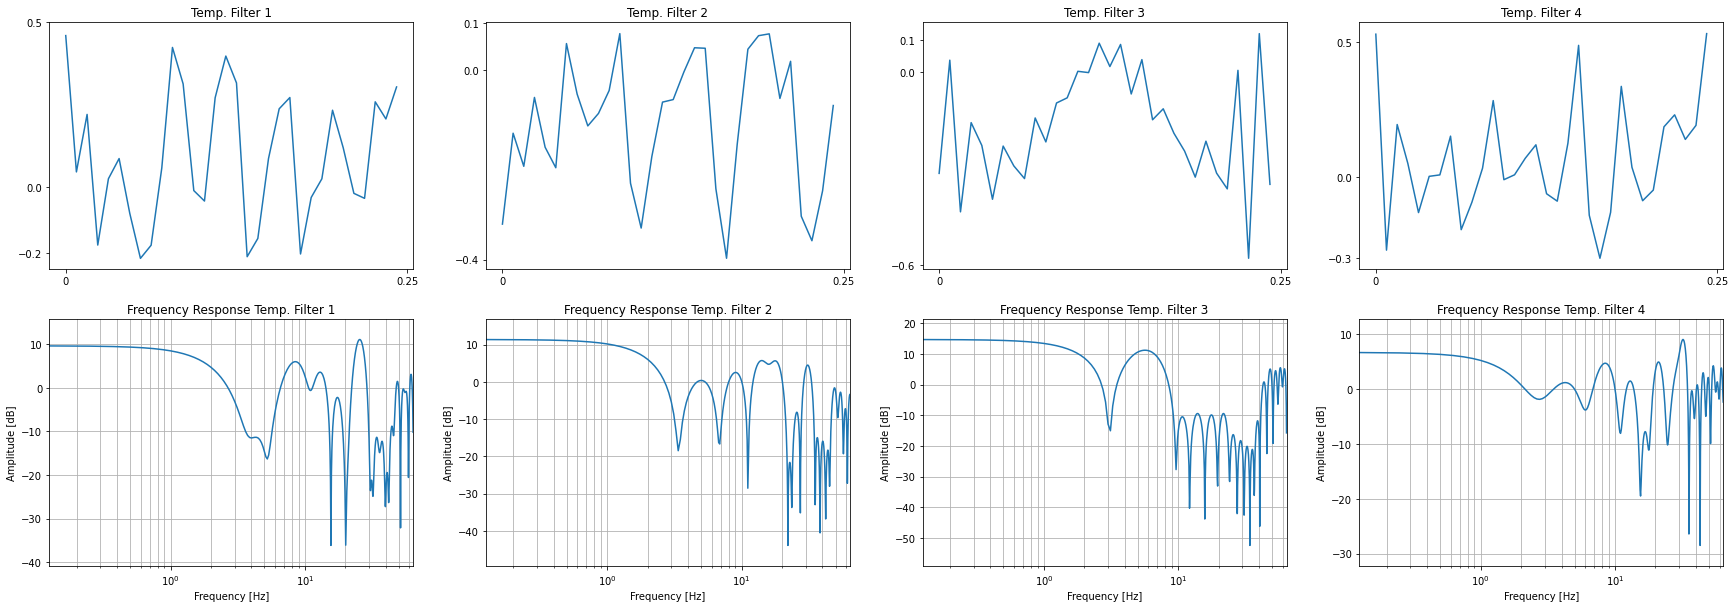

In [ ]:
#Frequencies learned
nyq_rate = info['sfreq'] #sample frequency
fig = plt.figure(figsize=(30,10))
frequency_layer = EEGGC_Net.get_layer('temporal_Conv')
W = frequency_layer.get_weights()[0] #FIR filters coefficientes (1, b, 1, f)
for f in range(W.shape[-1]):
  plt.subplot(2,4,f+1)
  plt.plot(W[0,:,0,f][::-1])
  plt.xticks(ticks=[0,kernLength], labels=[0, round(kernLength*(1/nyq_rate), 2)])
  plt.yticks(ticks=[round(W[0,:,0,f].min(),1), 0, round(W[0,:,0,f].max(),1)])
  plt.title('Temp. Filter '+str(f+1))

  w, h = freqz(W[0,:,0,f][::-1])
  plt.subplot(2,4,f+1+W.shape[-1])
  plt.semilogx((w*nyq_rate)/(2*np.pi), 20*np.log10(abs(h)))
  plt.title('Frequency Response Temp. Filter '+str(f+1))
  plt.xlabel('Frequency [Hz]')
  plt.ylabel('Amplitude [dB]')
  plt.margins(0, 0.1)
  plt.grid(which='both', axis='both')
plt.show()

- TEMP FILTER 1: Not clear the number of cycles (?)
- TEMP FILTER 2: Not clear the number of cycles (?)
- TEMP FILTER 3: 4 cycles (16 Hz)
- TEMP FILTER 4: 2 cycles (8 Hz)

Note: Important to resample the signal to 128Hz to reduce the number of parameters in the model (the brain activity range is not affected) and to get a kernLength int (exact number of samples).

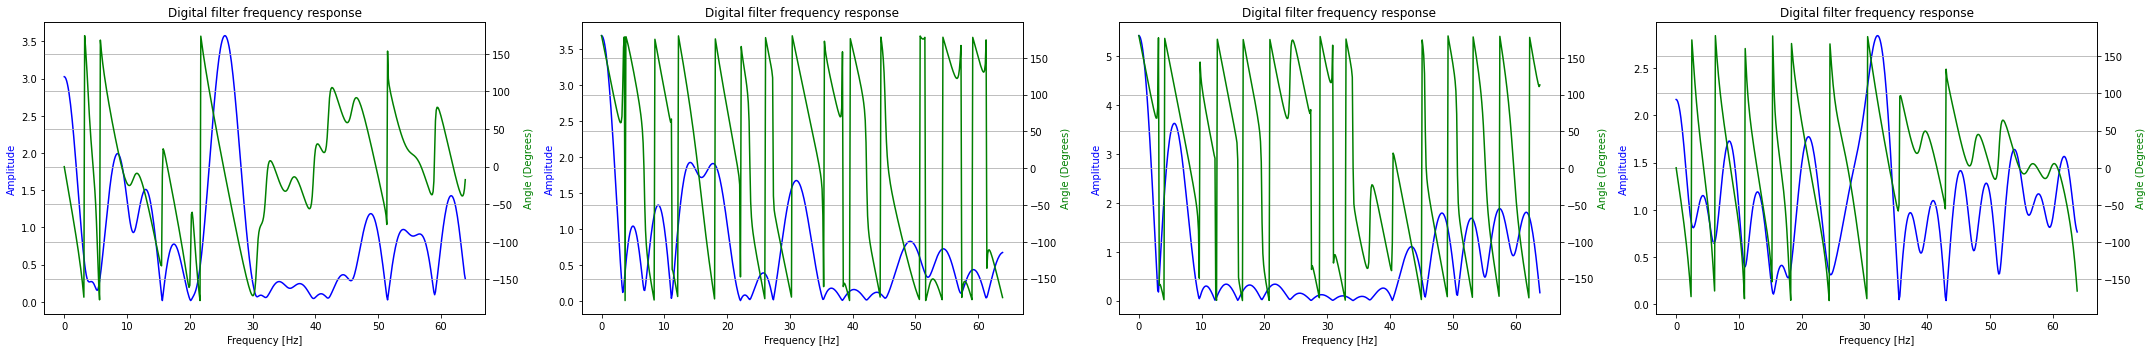

In [ ]:
#Frequencies learned
nyq_rate = info['sfreq'] #sample frequency
fig, axs = plt.subplots(1,4, figsize=(30,5))
frequency_layer = EEGGC_Net.get_layer('temporal_Conv')
W = frequency_layer.get_weights()[0] #FIR filters coefficientes (1, b, 1, f)
for f in range(W.shape[-1]):
  w, h = freqz(W[0,:,0,f][::-1])
  axs[f].set_title('Digital filter frequency response')
  axs[f].plot((w*nyq_rate)/(2*np.pi), abs(h), 'b')
  axs[f].set_ylabel('Amplitude', color='b')
  axs[f].set_xlabel('Frequency [Hz]')
  ax2 = axs[f].twinx()
  angles = np.angle(h, deg=True)
  ax2.plot((w*nyq_rate)/(2*np.pi), angles, 'g')
  ax2.set_ylabel('Angle (Degrees)', color='g')
  ax2.grid()
  ax2.axis('tight')
fig.tight_layout()
plt.show()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 22, 448, 1)]      0         
                                                                 
 temporal_Conv (Conv2D)      (None, 22, 448, 4)        128       
                                                                 
 pearson_Cxx (Lambda)        (None, 22, 22, 4)         0         
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


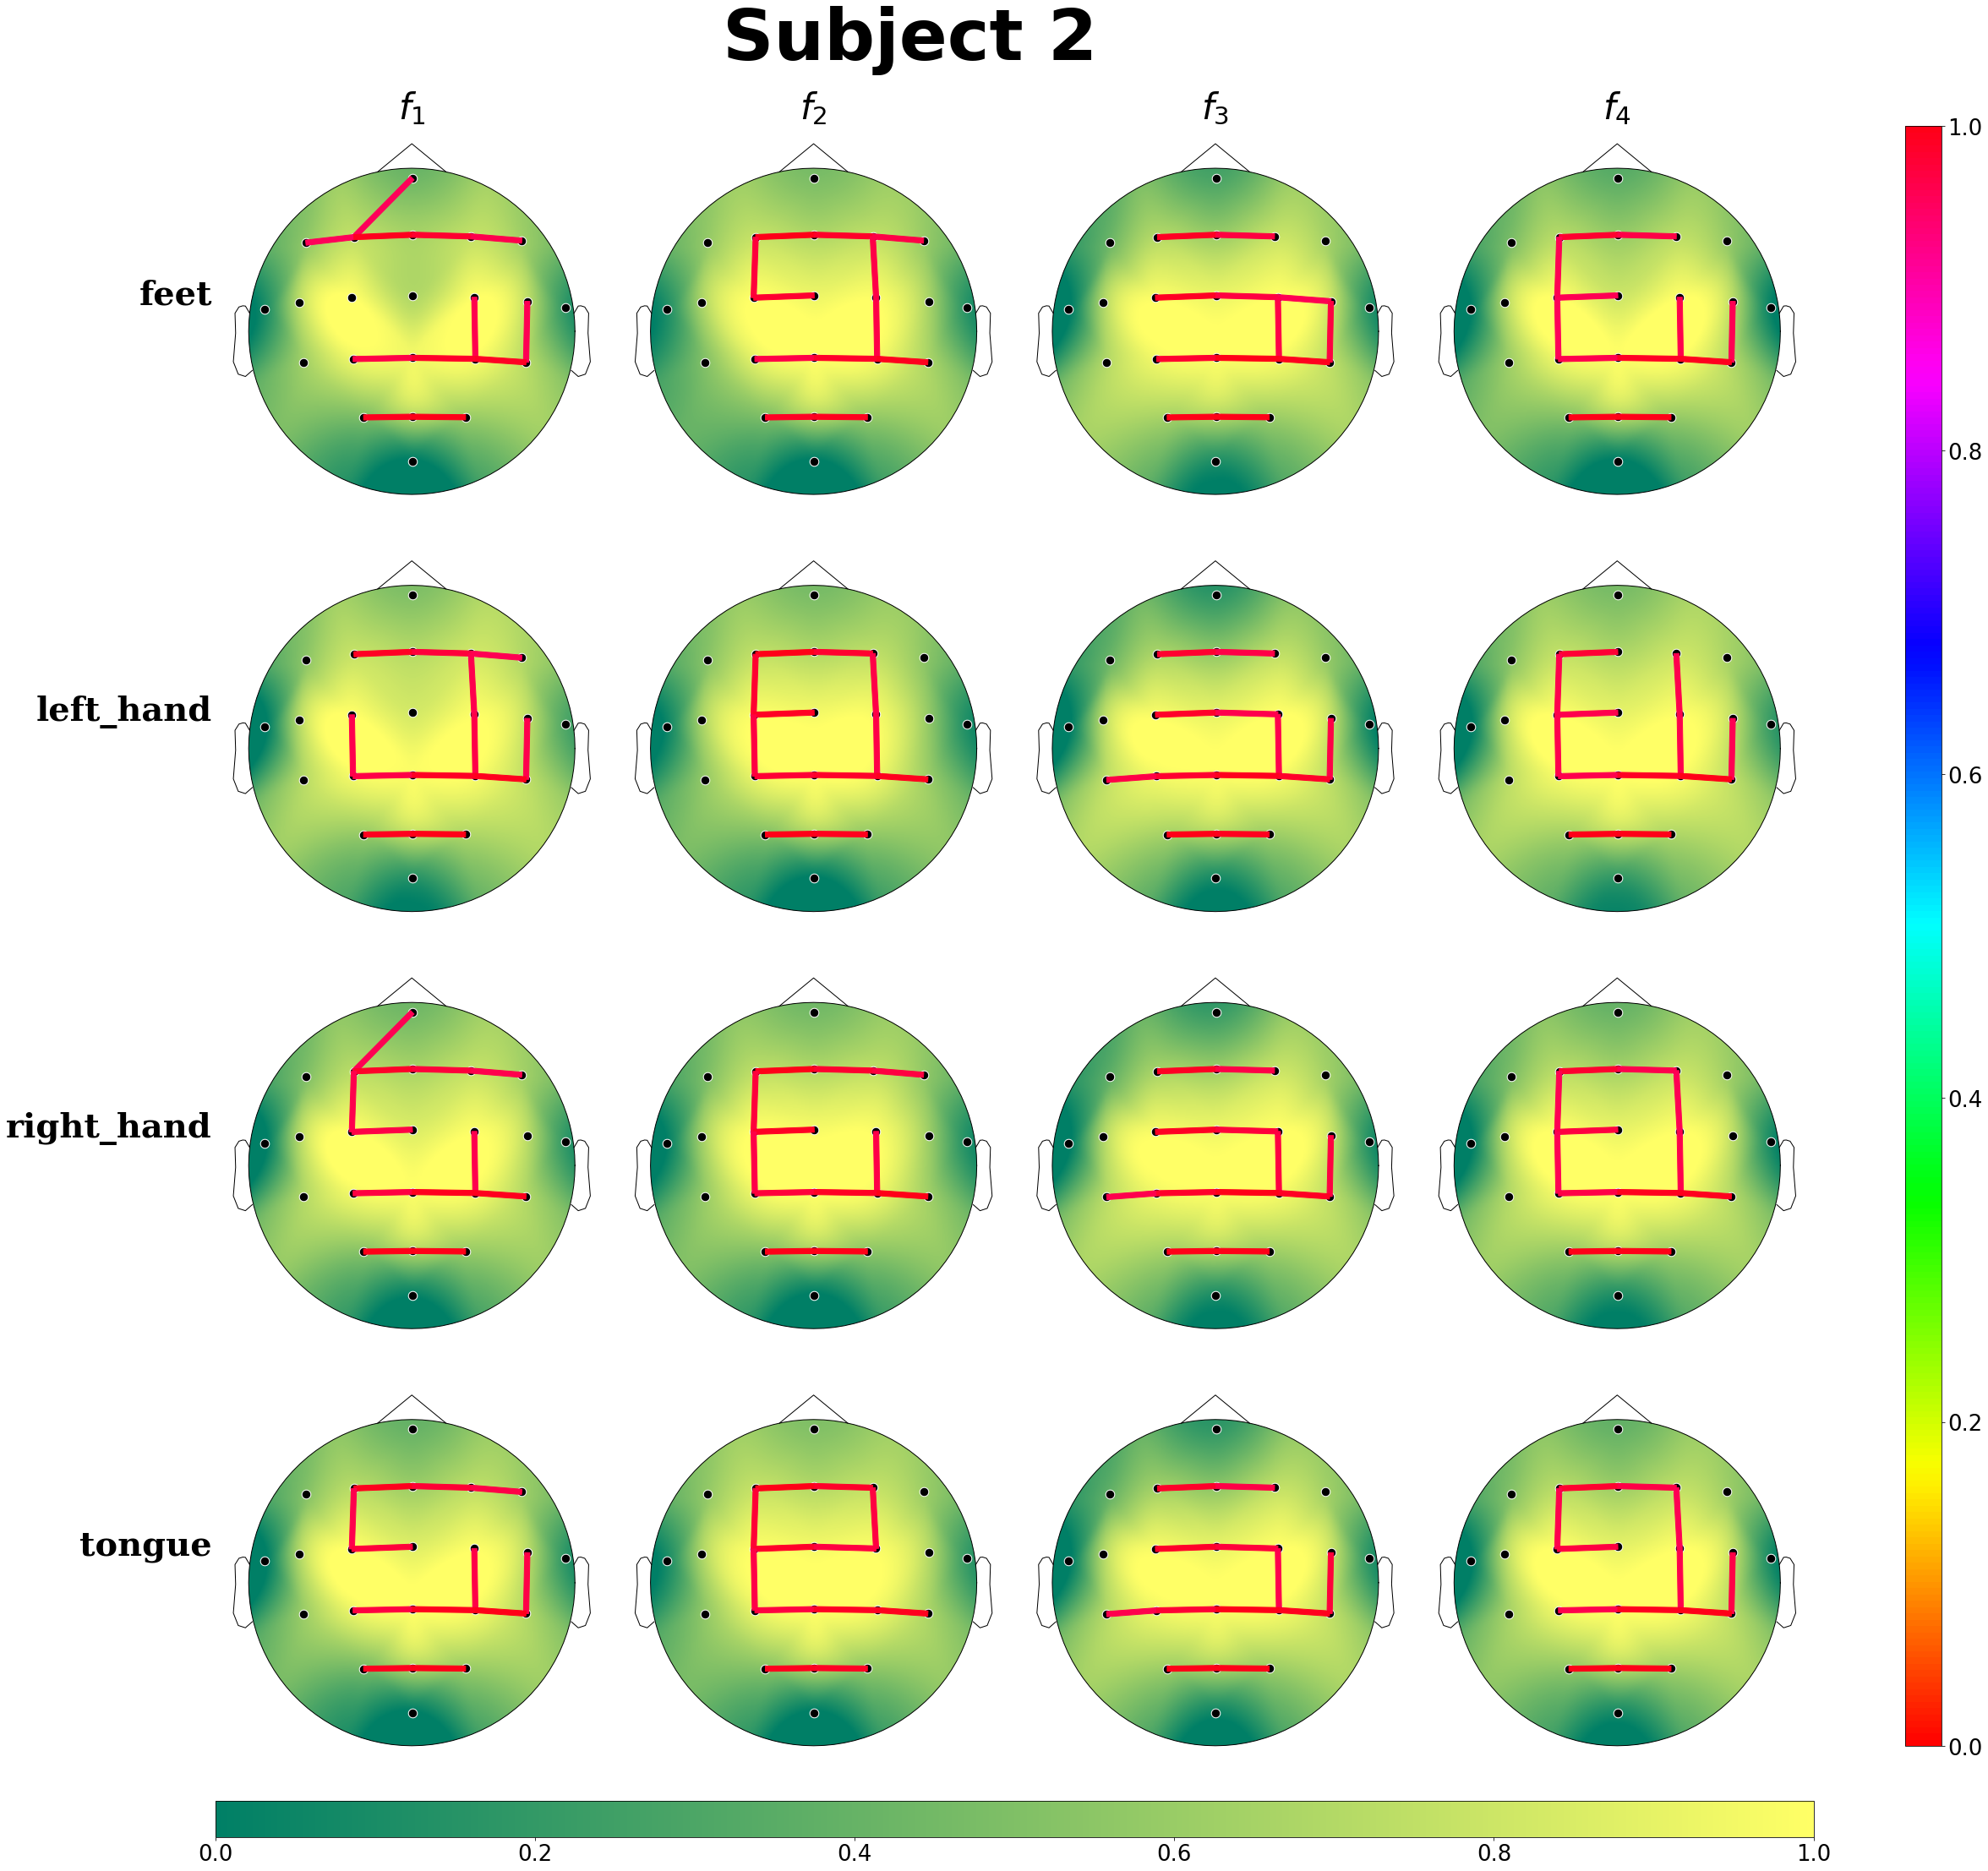

In [ ]:
#Connectivities by each frequency band
pearson_model = tf.keras.models.Model(inputs=[EEGGC_Net.inputs], outputs=[EEGGC_Net.get_layer('pearson_Cxx').output])
pearson_model.summary()
pearson_connectivities = np.abs(pearson_model.predict(X_test)) #(batch_size, ch, ch, frequency_filters)
utri_ind =  np.triu_indices(pearson_connectivities.shape[1], 1)

con = Connectivities(sfreq=info['sfreq'], f_bank=np.zeros((F,2)), vwt=np.zeros((len(classes),2))) #class for plotting connectivites

w_label = []
mean_pearson_connectivity_class = np.zeros((pearson_connectivities.shape[1], pearson_connectivities.shape[2], len(classes), pearson_connectivities.shape[-1]))

for cls, cls_id in mapping_classes.items():
  w_label.append(cls)
  mean_pearson_connectivity_class[:,:,cls_id,:] = pearson_connectivities[y_test==cls_id].mean(axis=0)
  
con.plot_connectivities(mean_pearson_connectivity_class[utri_ind[0],utri_ind[1],:,:].reshape(-1), info,  channels_names=info['ch_names'], thr=95, type_of_normalization='individual', montage='standard_1005', 
                        fig_title='Subject '+str(2), fb_label=[r'$f_1$', r'$f_2$', r'$f_3$', r'$f_4$'], w_label=w_label,
                        labels_params = {'ylabel_fonfamily':'serif', 'ylabel_fontsize':40, 'ylabel_weight':1000, 'xlabel_fonfamily':'serif', 'xlabel_fontsize':42, 'xlabel_weight':500, 'rotation':0, 'cl_size':26},
                        relevant_channels=False, plot_channels_names=False, figsize=(30,30), cmap_connectivities='hsv', cmap_tplt='summer',
                        show=True, save=False, path='Pearson_Cxx_'+str(2), format='pdf')

In [ ]:
(np.sum(pearson_connectivities > 0.85)/pearson_connectivities.size)*100

78.82625975665748

The majority of the functional connectivities get high values, the 84% of the connectivities are greater than 0.85. This means that the majoriy of channels are very similar. The channel Fz is not too important like in the sbj8

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 22, 448, 1)]      0         
                                                                 
 temporal_Conv (Conv2D)      (None, 22, 448, 4)        128       
                                                                 
 pearson_Cxx (Lambda)        (None, 22, 22, 4)         0         
                                                                 
 channel_embedding (Depthwis  (None, 22, 1, 8)         176       
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 2, 1, 88)          0         
                                                                 
 graph_embedding (Conv2D)    (None, 2, 1, 4)           88        
                                                           

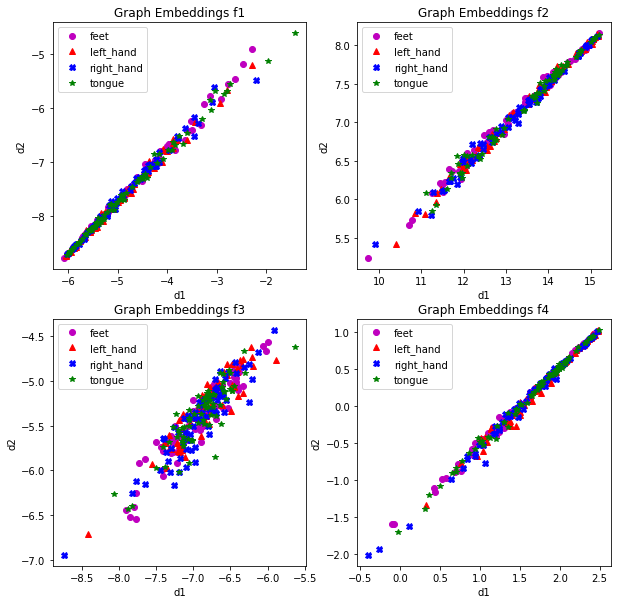

In [ ]:
#Graph embedding for every frequency band
graph_embedding_model = tf.keras.models.Model(inputs=[EEGGC_Net.inputs], outputs=[EEGGC_Net.get_layer('graph_embedding').output])
graph_embedding_model.summary()
graph_embeddings = graph_embedding_model.predict(X_test) #(batch_size, D, 1, frequency_filters)
plt.figure(figsize=(10,10))
for f in range(graph_embeddings.shape[-1]):
  plt.subplot(2,2,f+1)
  for cls_info, cls_stl in zip(mapping_classes.items(), ['om', '^r', 'Xb', '*g']):
    plt.plot(graph_embeddings[:,0,0,f][y_test==cls_info[1]], graph_embeddings[:,1,0,f][y_test==cls_info[1]], cls_stl, label=cls_info[0])
  plt.title('Graph Embeddings f'+str(f+1))
  plt.xlabel('d1')
  plt.ylabel('d2')
  plt.legend()

- The classes are not discriminative in any frequency band

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 22, 448, 1)]      0         
                                                                 
 temporal_Conv (Conv2D)      (None, 22, 448, 4)        128       
                                                                 
 pearson_Cxx (Lambda)        (None, 22, 22, 4)         0         
                                                                 
 channel_embedding (Depthwis  (None, 22, 1, 8)         176       
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 2, 1, 88)          0         
                                                                 
 graph_embedding (Conv2D)    (None, 2, 1, 4)           88        
                                                           

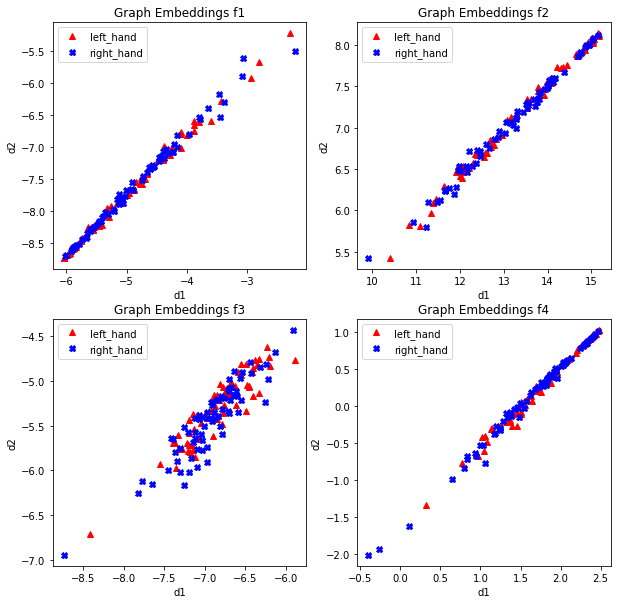

In [ ]:
#Graph embedding for every frequency band (left hand vs right hand)
graph_embedding_model = tf.keras.models.Model(inputs=[EEGGC_Net.inputs], outputs=[EEGGC_Net.get_layer('graph_embedding').output])
graph_embedding_model.summary()
graph_embeddings = graph_embedding_model.predict(X_test) #(batch_size, D, 1, frequency_filters)
plt.figure(figsize=(10,10))
for f in range(graph_embeddings.shape[-1]):
  plt.subplot(2,2,f+1)
  for cls_info, cls_stl in zip([('left_hand',1),('right_hand',2)], ['^r', 'Xb']):
    plt.plot(graph_embeddings[:,0,0,f][y_test==cls_info[1]], graph_embeddings[:,1,0,f][y_test==cls_info[1]], cls_stl, label=cls_info[0])
  plt.title('Graph Embeddings f'+str(f+1))
  plt.xlabel('d1')
  plt.ylabel('d2')
  plt.legend()

left hand vs right hand not discriminative, in sbj8 is discriminative

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 22, 448, 1)]      0         
                                                                 
 temporal_Conv (Conv2D)      (None, 22, 448, 4)        128       
                                                                 
 pearson_Cxx (Lambda)        (None, 22, 22, 4)         0         
                                                                 
 channel_embedding (Depthwis  (None, 22, 1, 8)         176       
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 2, 1, 88)          0         
                                                                 
 graph_embedding (Conv2D)    (None, 2, 1, 4)           88        
                                                           

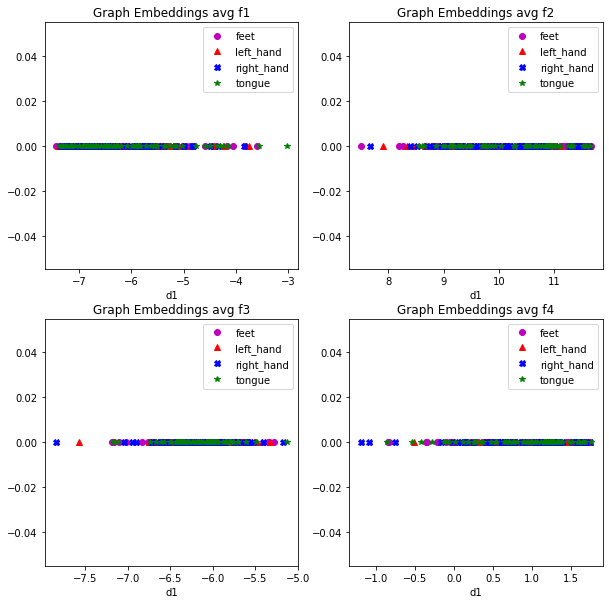

In [ ]:
#Mean of graph embedding for every frequency band
graph_embedding_avg_model = tf.keras.models.Model(inputs=[EEGGC_Net.inputs], outputs=[EEGGC_Net.get_layer('avg_graph_embedding').output])
graph_embedding_avg_model.summary()
graph_embeddings_avg = graph_embedding_avg_model.predict(X_test) #(batch_size, frequency_filters)
plt.figure(figsize=(10,10))
for f in range(graph_embeddings_avg.shape[-1]):
  plt.subplot(2,2,f+1)
  for cls_info, cls_stl in zip(mapping_classes.items(), ['om', '^r', 'Xb', '*g']):
    plt.plot(graph_embeddings_avg[:,f][y_test==cls_info[1]], np.zeros(graph_embeddings_avg[:,f][y_test==cls_info[1]].shape[0]) , cls_stl, label=cls_info[0])
  plt.title('Graph Embeddings avg f'+str(f+1))
  plt.xlabel('d1')
  plt.legend()

In [ ]:
#Plot space of mean of graph embedding (Separability of trials)
from sklearn.decomposition import PCA

In [ ]:
#Mean of graph embedding for every frequency band
graph_embedding_avg_model = tf.keras.models.Model(inputs=[EEGGC_Net.inputs], outputs=[EEGGC_Net.get_layer('avg_graph_embedding').output])
graph_embedding_avg_model.summary()
graph_embeddings_avg = graph_embedding_avg_model.predict(X_test) #(batch_size, frequency_filters)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 22, 448, 1)]      0         
                                                                 
 temporal_Conv (Conv2D)      (None, 22, 448, 4)        128       
                                                                 
 pearson_Cxx (Lambda)        (None, 22, 22, 4)         0         
                                                                 
 channel_embedding (Depthwis  (None, 22, 1, 8)         176       
 eConv2D)                                                        
                                                                 
 sequential (Sequential)     (None, 2, 1, 88)          0         
                                                                 
 graph_embedding (Conv2D)    (None, 2, 1, 4)           88        
                                                          

In [ ]:
pca = PCA(n_components=2)

In [ ]:
geavg_pca = pca.fit_transform(graph_embeddings_avg)

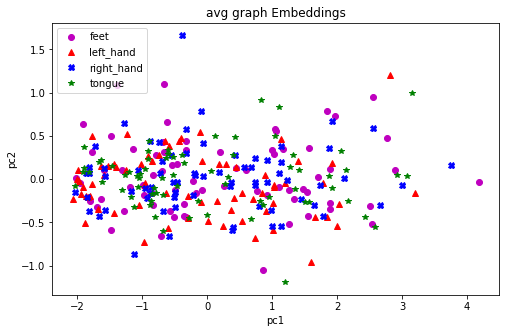

In [ ]:
#all classes 
fig = plt.figure(figsize=(8,5))
for cls_info, cls_stl in zip(mapping_classes.items(), ['om', '^r', 'Xb', '*g']):
  plt.plot(geavg_pca[:,0][y_test==cls_info[1]], geavg_pca[:,1][y_test==cls_info[1]], cls_stl, label=cls_info[0])
plt.title('avg graph Embeddings')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(loc=2)

Not discriminative classes

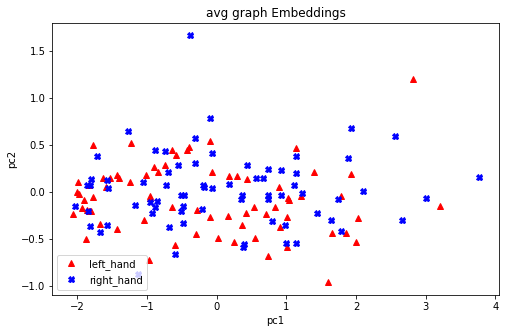

In [ ]:
#lef hand vs right hand
fig = plt.figure(figsize=(8,5))
for cls_info, cls_stl in zip([('left_hand',1),('right_hand',2)], ['^r', 'Xb']):
  plt.plot(geavg_pca[:,0][y_test==cls_info[1]], geavg_pca[:,1][y_test==cls_info[1]], cls_stl, label=cls_info[0])
plt.title('avg graph Embeddings')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(loc=3)

left vs right hand not discriminative

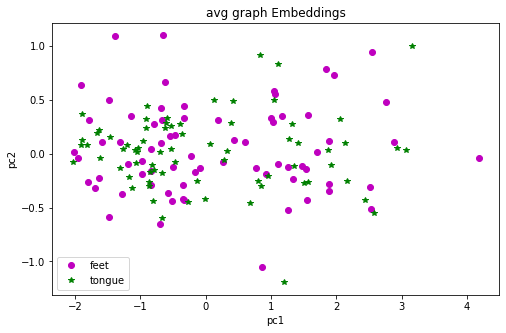

In [ ]:
#feet vs tongue
fig = plt.figure(figsize=(8,5))
for cls_info, cls_stl in zip([('feet',0),('tongue',3)], ['om', '*g']):
  plt.plot(geavg_pca[:,0][y_test==cls_info[1]], geavg_pca[:,1][y_test==cls_info[1]], cls_stl, label=cls_info[0])
plt.title('avg graph Embeddings')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(loc=3)

feet and tongue classes are not discriminative 

Text(0.5, 1.0, 'Relevance Analysis')

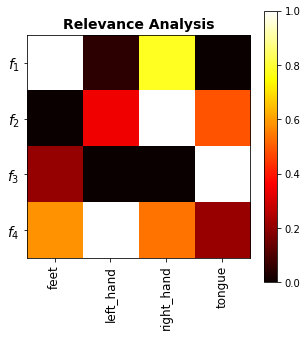

In [ ]:
#Importance of each frequency band by the predicted class
dense_layer = EEGGC_Net.get_layer('dense')
W, b = dense_layer.get_weights()
W = np.abs(W)
W_norm = (W - W.min(axis=0, keepdims=True))/(W.max(axis=0, keepdims=True) - W.min(axis=0, keepdims=True))
fig = plt.figure(figsize=(5,5))
plt.imshow(W_norm, cmap='hot')
plt.xticks(ticks=range(0,W_norm.shape[-1]), labels=classes, rotation=90, size=12)
plt.yticks(ticks=range(0,W_norm.shape[0]), labels=[r'$f_' + str(f+1) + '$' for f in range(W_norm.shape[0])], size=14)
plt.colorbar()
plt.title('Relevance Analysis', fontdict={'fontsize':14, 'fontweight':'bold'})

  f2 is the frequency "most discriminative"

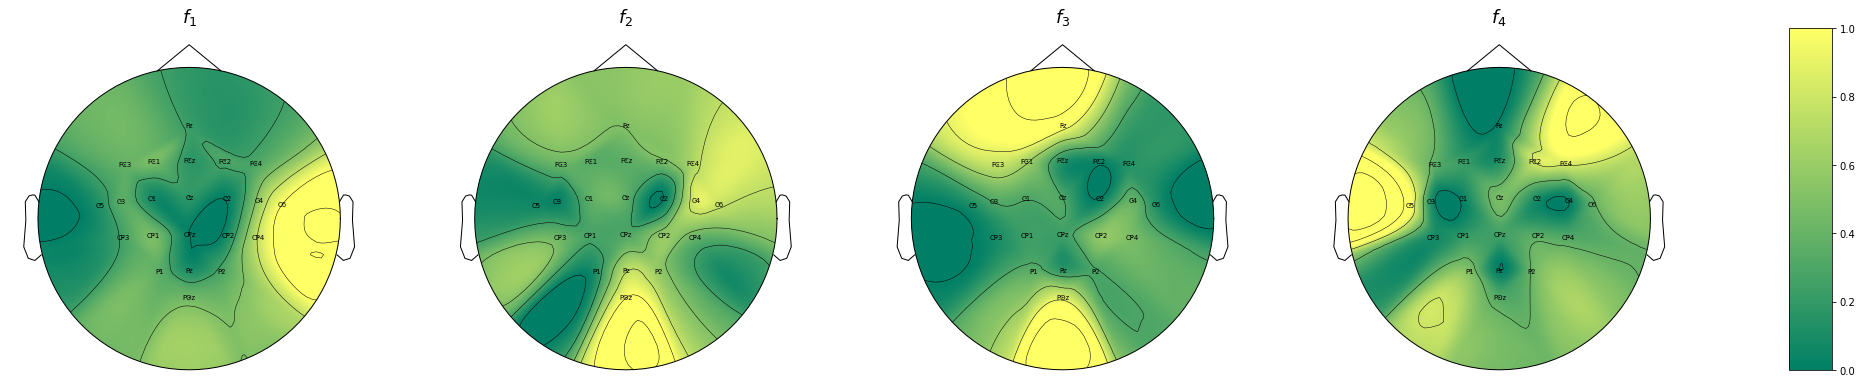

In [ ]:
#Importance of channels embeddings for graph embedding (by frequncies)
graph_embedding_layer = EEGGC_Net.get_layer('graph_embedding')
W = graph_embedding_layer.get_weights()[0]
W = np.abs(W[0,0,:,:])
W_norm = (W - W.min(axis=0, keepdims=True))/(W.max(axis=0, keepdims=True) - W.min(axis=0, keepdims=True))
fig, axs = plt.subplots(1,4, squeeze=False, figsize=(30,15))
for f in range(W_norm.shape[-1]):
  plot_topomap(W_norm[:,f], info, vmin=0, vmax=1, cmap='summer', names=info['ch_names'], show_names=True, contours=5, axes=axs[0,f], show=False)
  title = r'$f_' + str(f+1) + '$'
  axs[0,f].set_title(title, fontdict={'fontsize':18, 'fontweight':'bold'})

cax=fig.add_axes([axs[-1,-1].get_position().x1 + 0.05,axs[-1,-1].get_position().y0,0.02,axs[0,-1].get_position().y1-axs[-1,-1].get_position().y0])
#Mappeable objects for topomaps colorbar
sm = plt.cm.ScalarMappable(cmap='summer')
sm.set_array(W_norm.ravel())
cbar = fig.colorbar(sm, cax=cax)
for t in cbar.ax.get_xticklabels():
    t.set_fontsize(12)

Analysis: 
- The subject does not have a high activity in the central channels (sensorimotor region). Only in the frequency 2 where the classes are most discriminative. However, there is activity in different regions like occipital and parietal in f1 and f4. In frontal there is activity in f4 and in temporal in f3.

When you compare the channels importance of the subject 2 with subject 8 is very clear that the information of the good subjects is located in central channels (sensorimotor region) while the info of the bad subjects is spread in different regions, the is not a clear pattern.